In [1]:
import multiprocessing as mp                                                                                                                                                                                       
import os                                                                                                                                                                                                          
import numpy as np                                                                                                                                                                                                 
import awkward as ak                                                                                                                                                                                               
import matplotlib.pyplot as plt                                                                                                                                                                                    
import matplotlib                                                                                                                                                                                                  
import matplotlib.colors as colors                                                                                                                                                                                 
from tools.roottree import read_tree                                                                                                                                                                               
from tools.selections import *                                                                                                                                                                                     
import scipy.stats                                                                                                                                                                                                 
from scipy.optimize import curve_fit                                                                                                                                                                               
                                                                                                                   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, FIGSIZE_MID, FIGSIZE_BIG, setplot_defaultstyle, format_order_of_magnitude, FONTSIZE                                                           
from tools.studybeta import calc_signal_fraction                                                                                
from tools.binnings_collection import fbinning_fraction, fbinning_RICHnpe                                                                                                                                          
from tools.binnings_collection import get_nbins_in_range, get_sub_binning, get_bin_center                                                                                                                          
from tools.studybeta import minuitfit_LL, cdf_gaussian, calc_signal_fraction, cdf_double_gaus, double_gaus, minuitfit_Chi
from tools.histograms import WeightedHistogram, Histogram, plot_histogram_2d, plot_histogram_1d   
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar, savefig_tofile, setplot_defaultstyle, FIGSIZE_BIG, FIGSIZE_SQUARE, FIGSIZE_MID, FIGSIZE_WID, plot1d_step, FONTSIZE, set_plot_defaultstyle  
from tools.constants import ISOTOPES_MASS, NUCLEI_CHARGE, NUCLEIS, ISOTOPES
from tools.functions import cumulative_norm_gaus, normalized_gaussian, poly, upoly
from tools.graphs import MGraph, slice_graph, plot_graph, slice_graph_by_value, concatenate_graphs, Add_point_to_graph

from tools.constants import ISOTOPES_MASS, DETECTOR_COLOR
from tools.massfit_tools import get_fitpdferrorband, get_fitpdf_witherr
import uncertainties                                                                                                                                                                                               
from uncertainties import unumpy                                                                                                                                                                                   
from uncertainties import ufloat   


/home/manbing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta_refNaF_beta2tuned_B1236P8mcweight.npz'
#filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta_refAgl_beta2tuned_B1236P8mcweight.npz'

filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbetaResidual_refNaF_beta2Tuned_B1236P8mcweight.npz'
filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbetaResidual_refAgl_beta2Tuned_B1236P8mcweight.npz'

#filename_histrefagl = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbetaResidual_refAgl_beta2Tuned_B1236P8mcweight.npz'
#filename_histrefnaf = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbetaResidual_refNaF_beta2Tuned_B1236P8mcweight.npz'

detectors = ['Tof', 'NaF', 'Agl']
hist_mcbeta = {}
hist_issbeta = {}
hist_issbeta_sv = {}
nuclei = 'O'
isotopes = ISOTOPES[nuclei]
#nucleiname = 'Be'
MCName = 'O16 MC'

datadir = '/home/manbing/Documents/Data/data_BeP8/'
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/isotopes_0111/plots_0111'
figsuffix = 'tofbeta1_refRICHTuned'
isscolor = 'black'
mccolor = 'blue'
figtext = 'Tuned'

nucleiname = {'O': 'Oxygen', 'C':'Carbon', 'Be': 'Be', 'B': 'Boron', 'Li': 'Li'}
MCNameText = {'Be': 'Be MC(Be7:9:10=[6:3:1])', 'B': 'B MC(B10:B11=[1:1])', 'C': 'C12 MC', 'O': 'O16 MC', 'Li': 'Li MC(Li6:7=1:1)'}



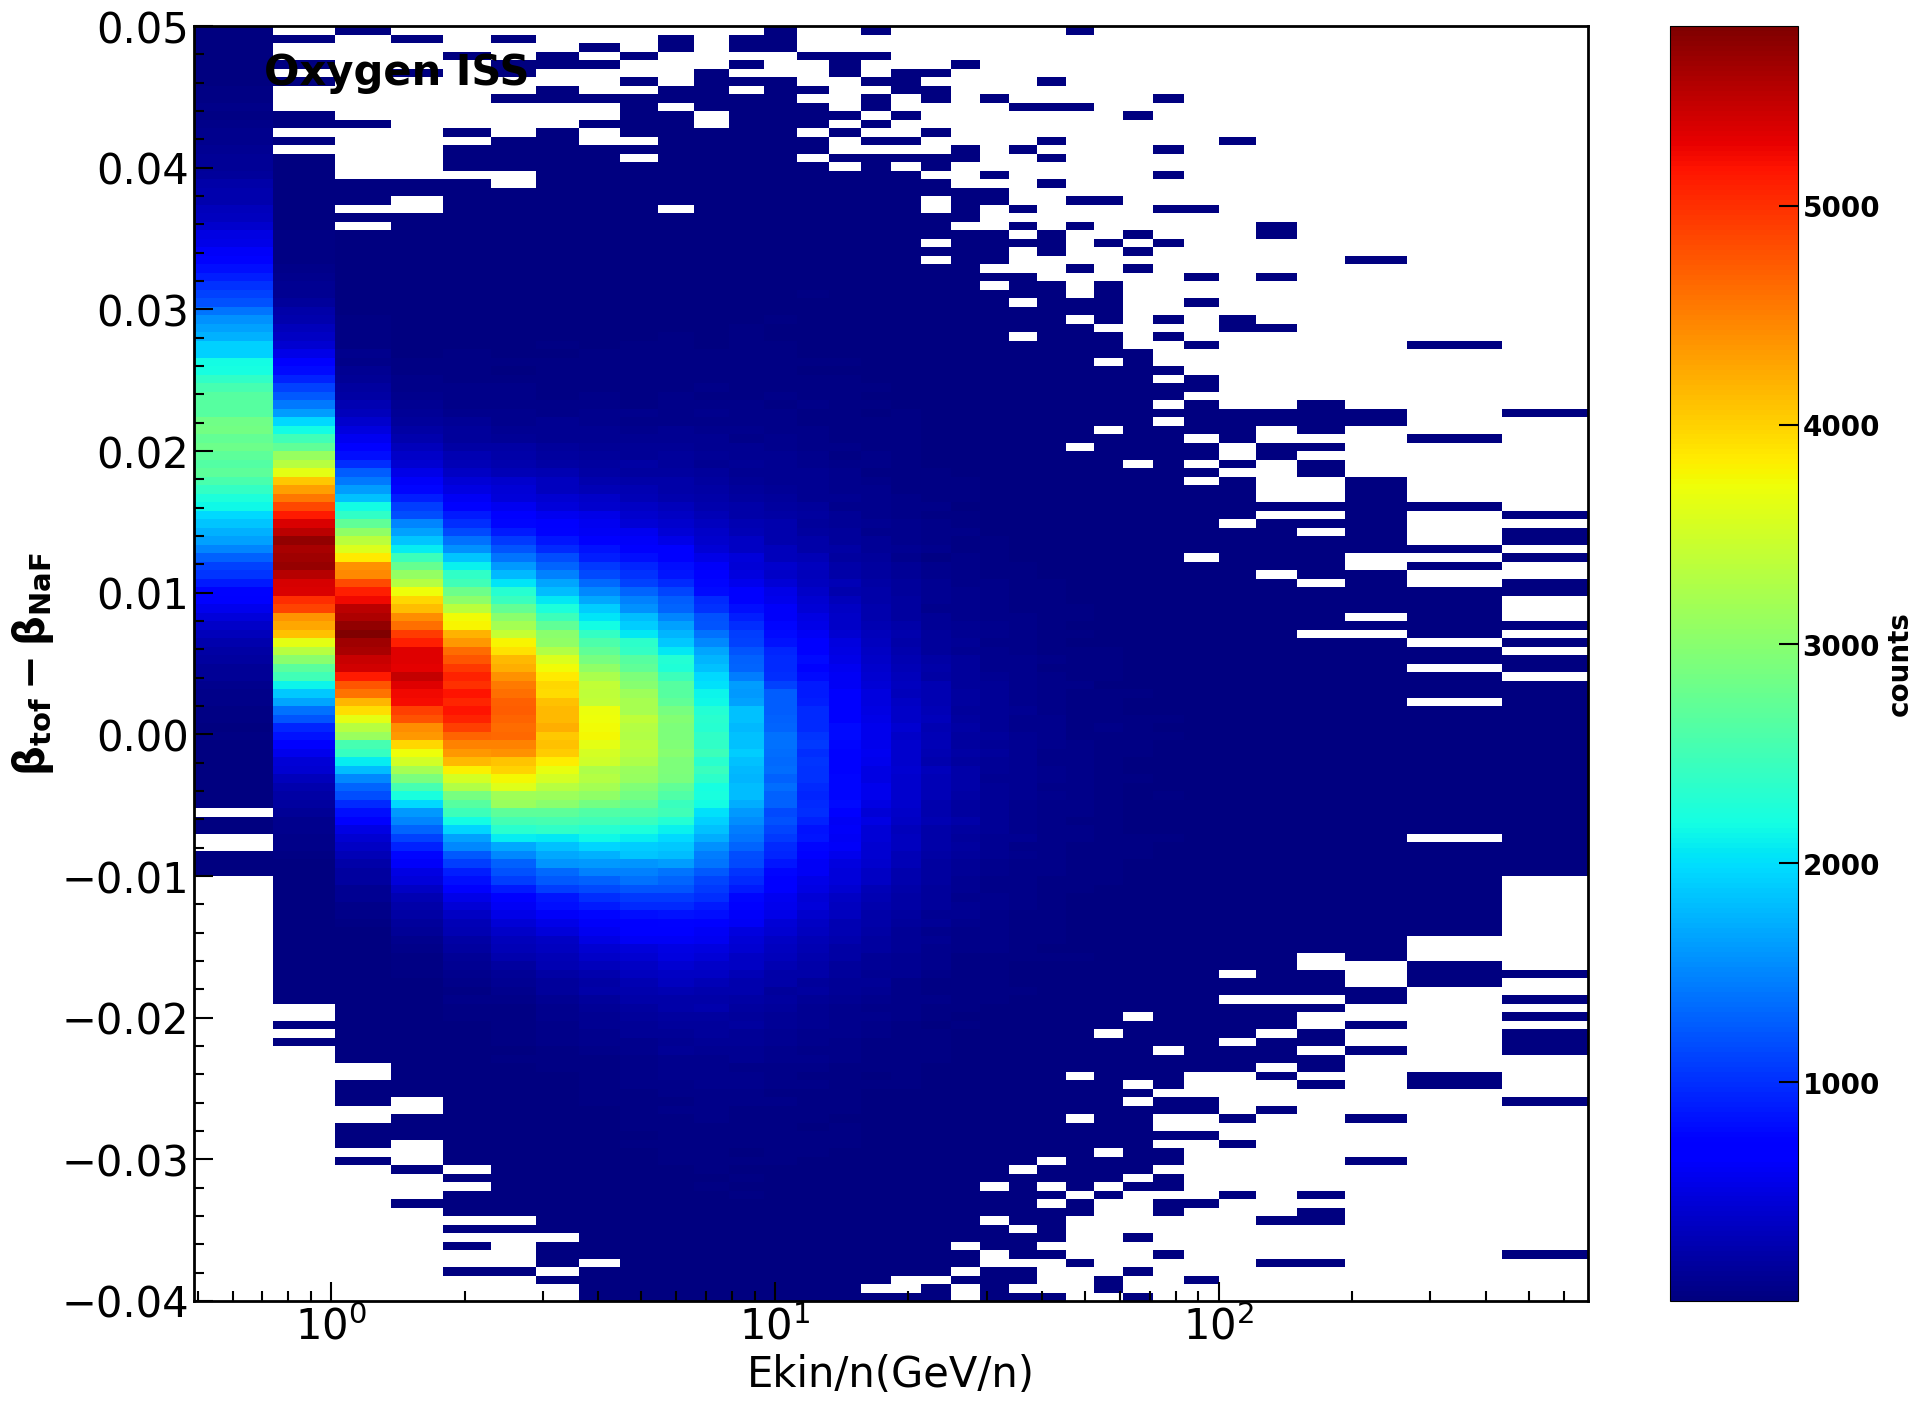

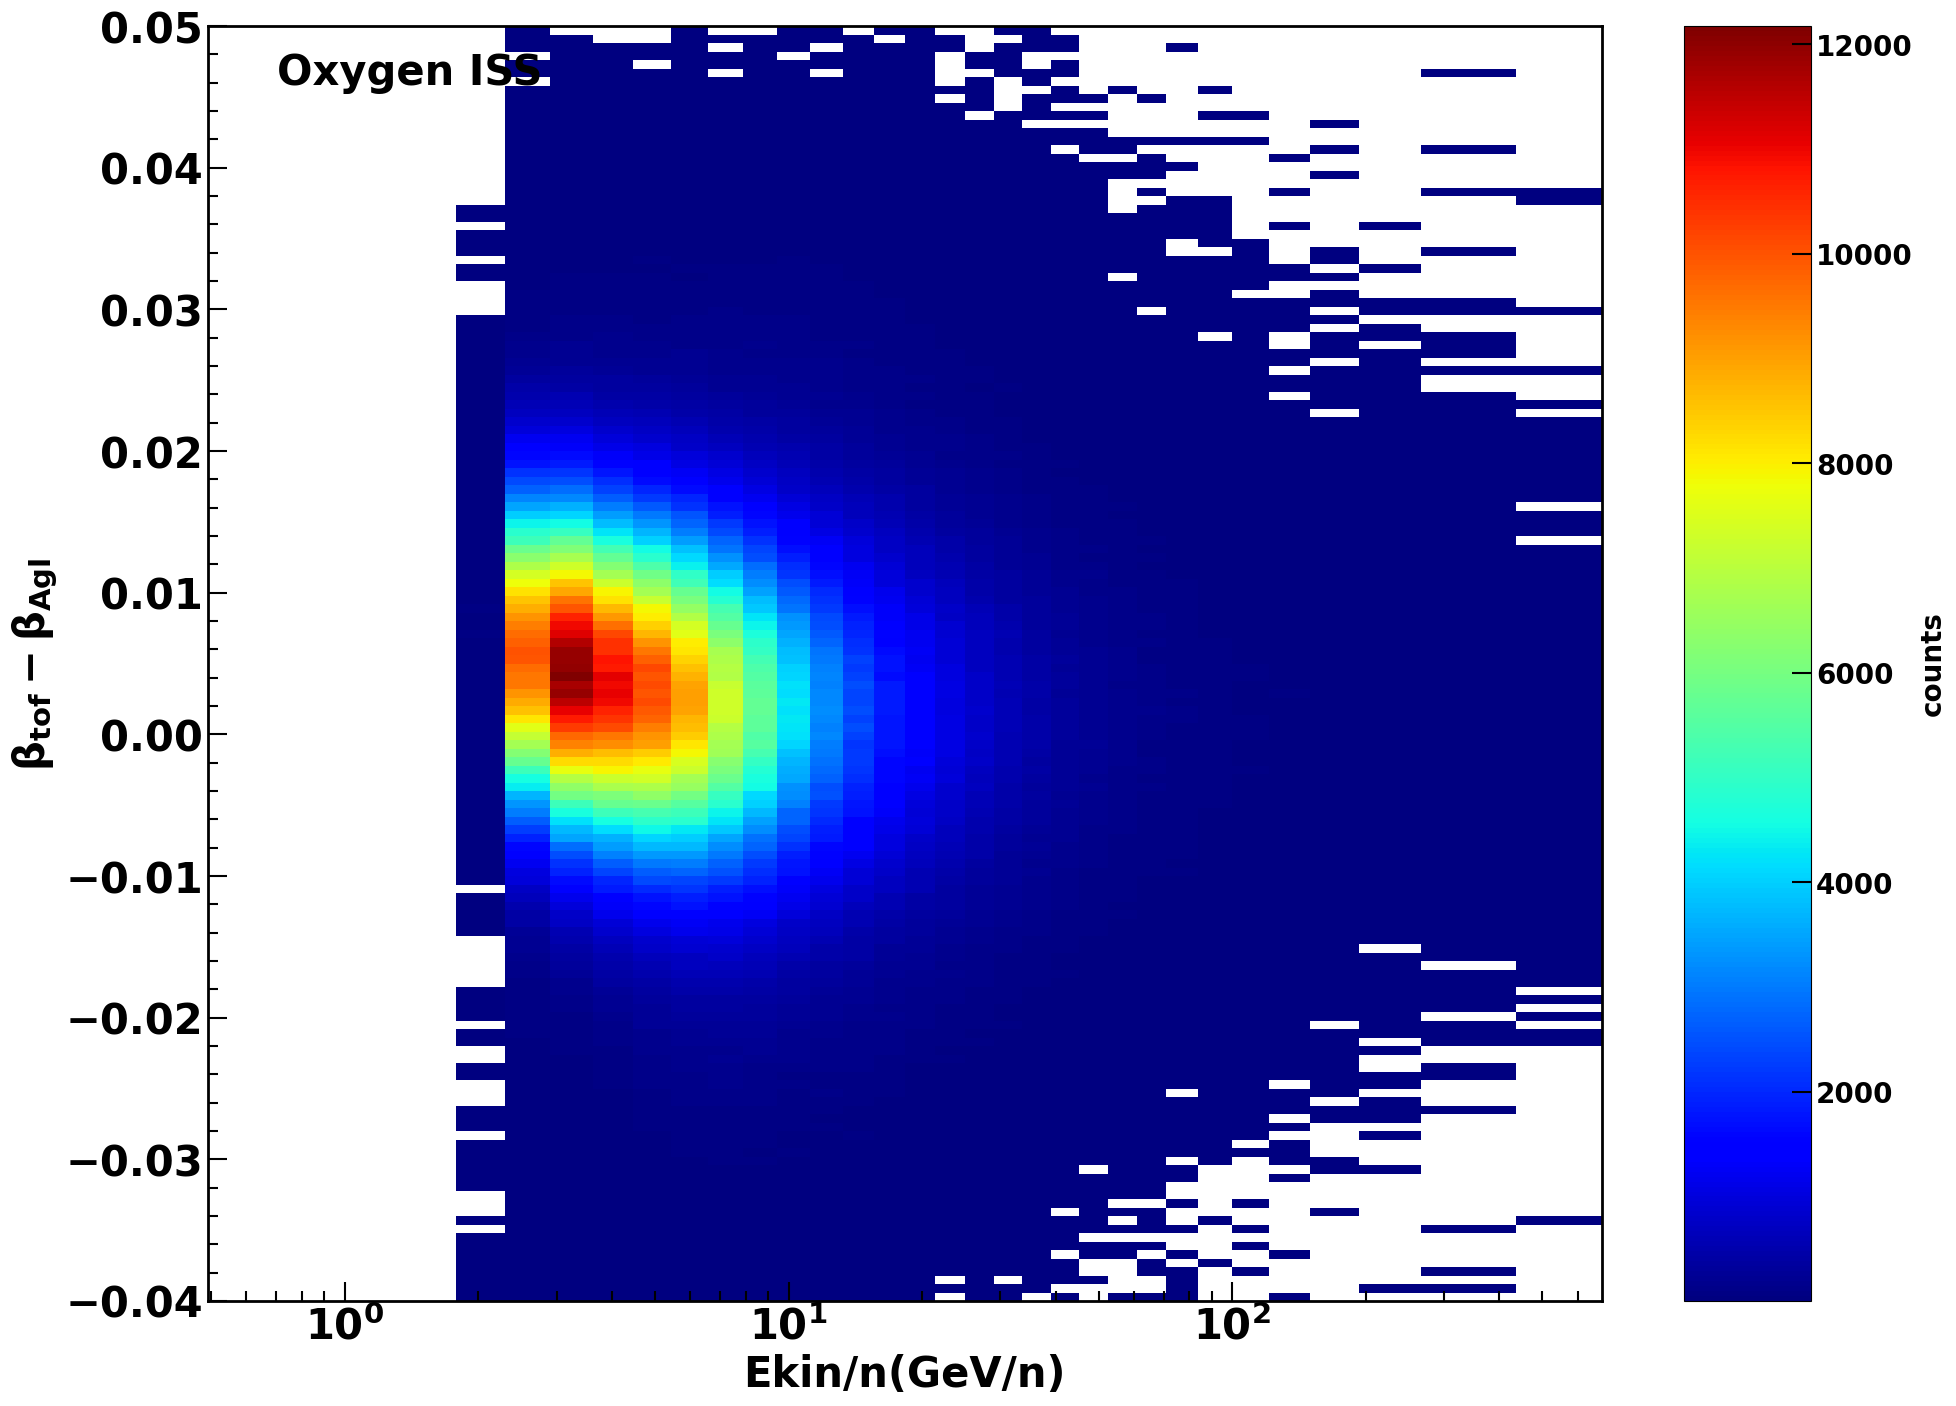

In [3]:

datatype = {'iss', 'mc'}
filename = {'NaF': f'{filename_histrefnaf}', 'Agl':f'{filename_histrefagl}'}
decs = ['NaF', 'Agl']

hist2d_iss = {}
hist2d_mc = {}
for dec in decs: 
    npzfile = np.load(filename[dec])
    hist2d_iss[dec] = WeightedHistogram.from_file(npzfile, f"hist_issbetareso_{dec}") 
    hist2d_mc[dec] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_{dec}")  
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_iss[dec].binnings[0].edges[1:-1], 
               ybinning=hist2d_iss[dec].binnings[1].edges[1:-1], 
               counts=hist2d_iss[dec].values[1:-1, 1:-1], 
               xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
               setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
    plot.text(0.05, 0.98, f"{nucleiname[nuclei]} ISS", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{{dec}}}}}$', fontsize=30)
    #plot.set_ylabel(rf'$\mathrm{{ (\beta_{{tof}}-\beta_{{{dec}}})/\beta_{{{dec}}}}}$', fontsize=30)
    plot.set_xscale('log')
    #plot.set_xlim(gammalim[dec])
    savefig_tofile(fig, plotfile, f"hist2dResidual_{figsuffix}_Compare_iss_{nucleiname}{dec}", show=True) 
    
  
            
            


36


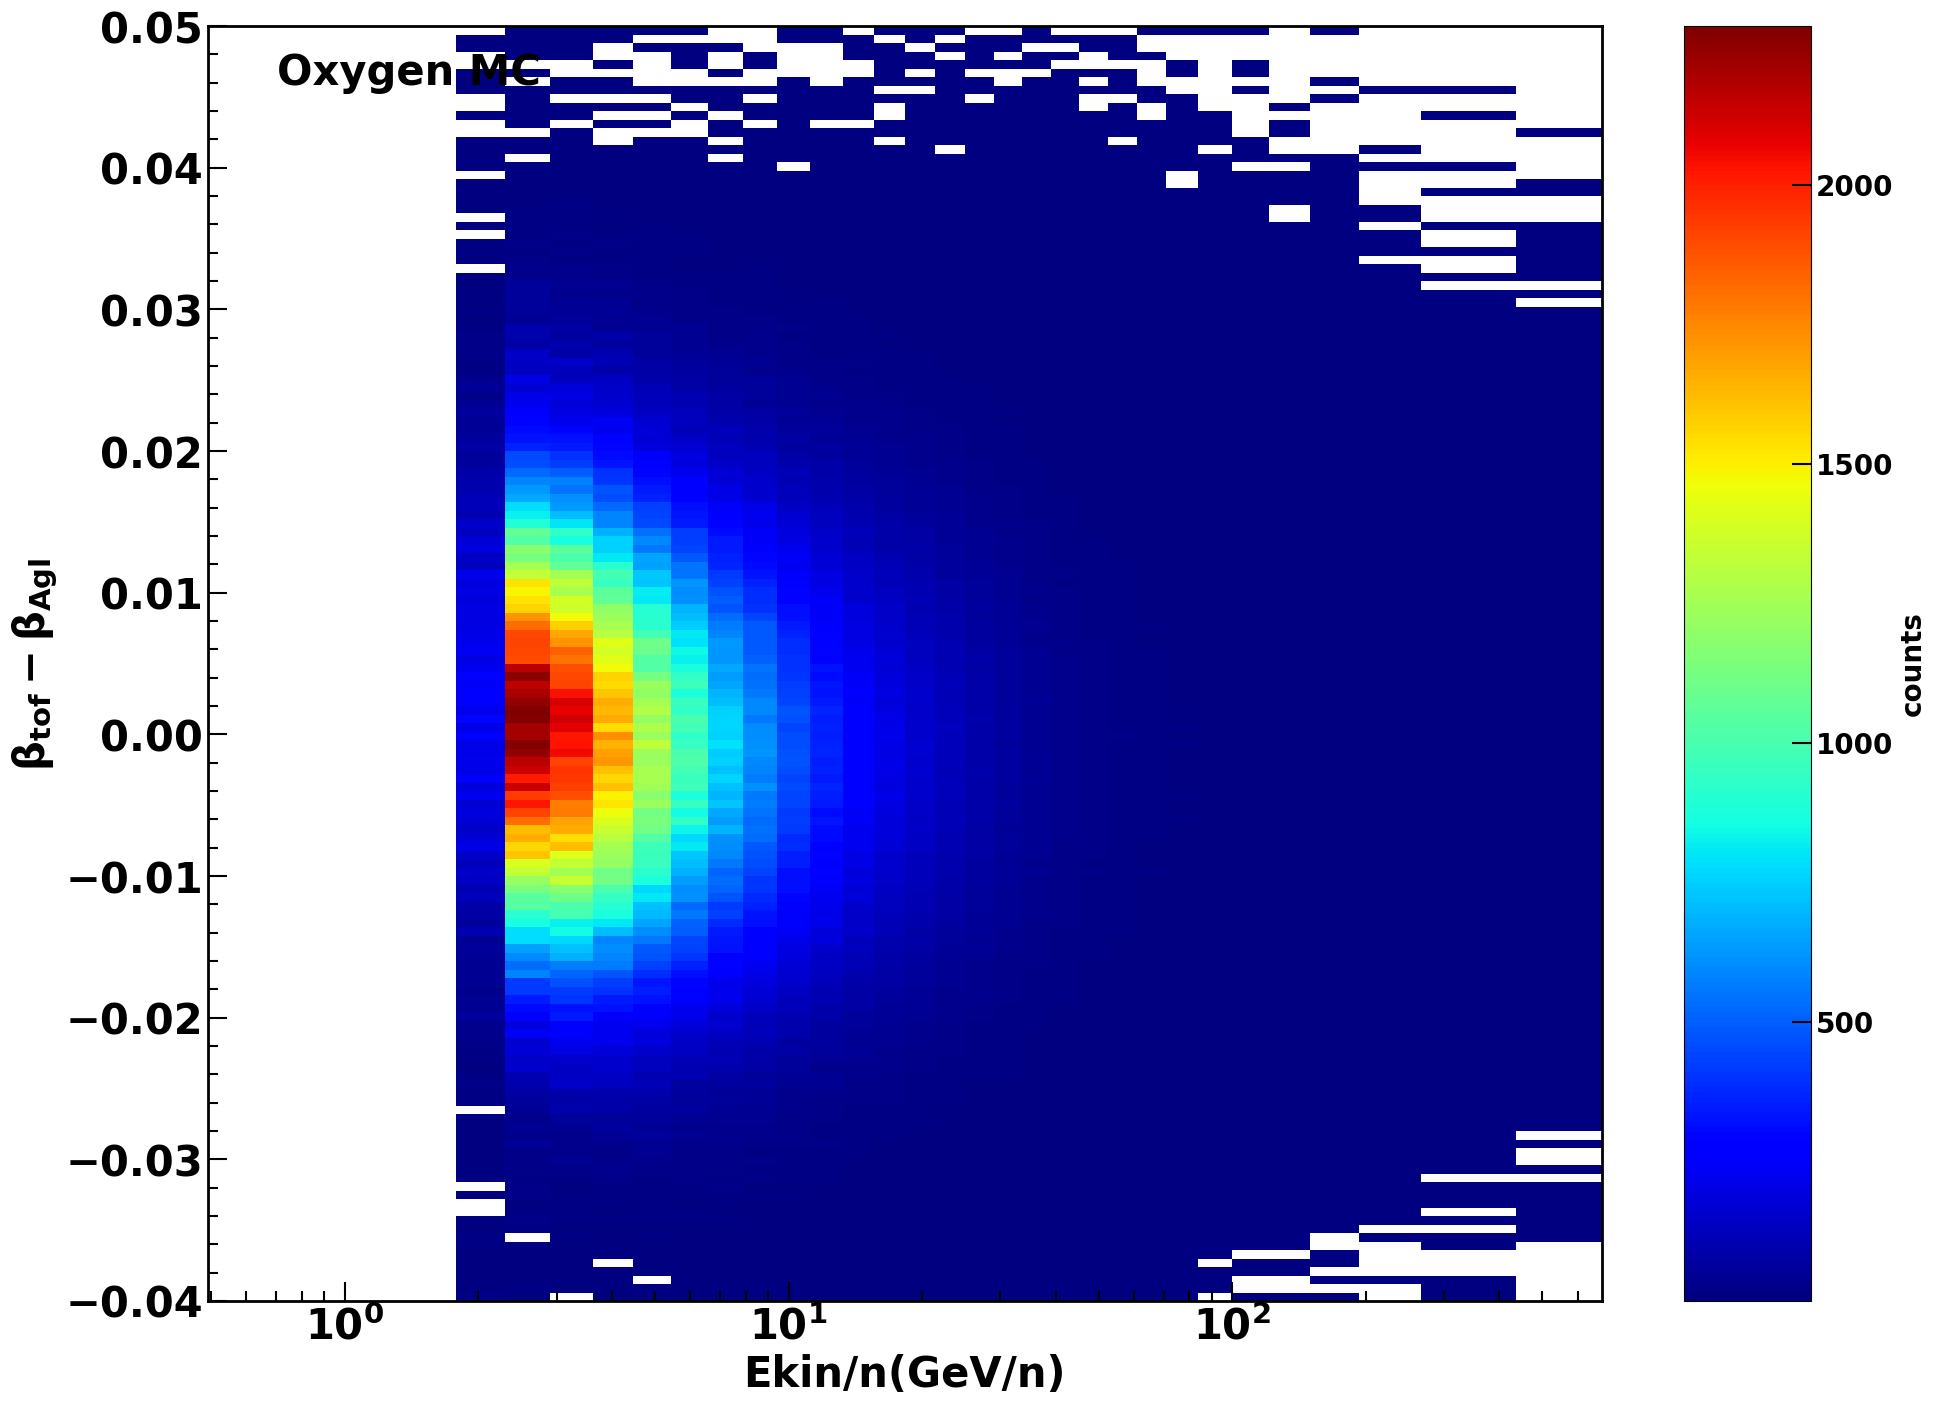

In [4]:
fig = plt.figure(figsize=(20, 15))
plot = fig.subplots(1, 1) 
plot2dhist(fig, plot, xbinning=hist2d_mc[dec].binnings[0].edges[1:-1], 
            ybinning=hist2d_mc[dec].binnings[1].edges[1:-1], 
            counts=hist2d_mc[dec].values[1:-1, 1:-1], 
            xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
            setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
plot.set_ylabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{{dec}}}}}$', fontsize=30)
#plot.set_ylabel(rf'$\mathrm{{ (\beta_{{tof}}-\beta_{{{dec}}})/\beta_{{{dec}}}}}$', fontsize=30)
plot.set_xscale('log')
#plot.set_xlim(gammalim[dec])
savefig_tofile(fig, plotfile, f"hist2dReso_{figsuffix}_Compare_mc_{nucleiname}", show=True)  

print(len(hist2d_mc[dec].binnings[0].edges))

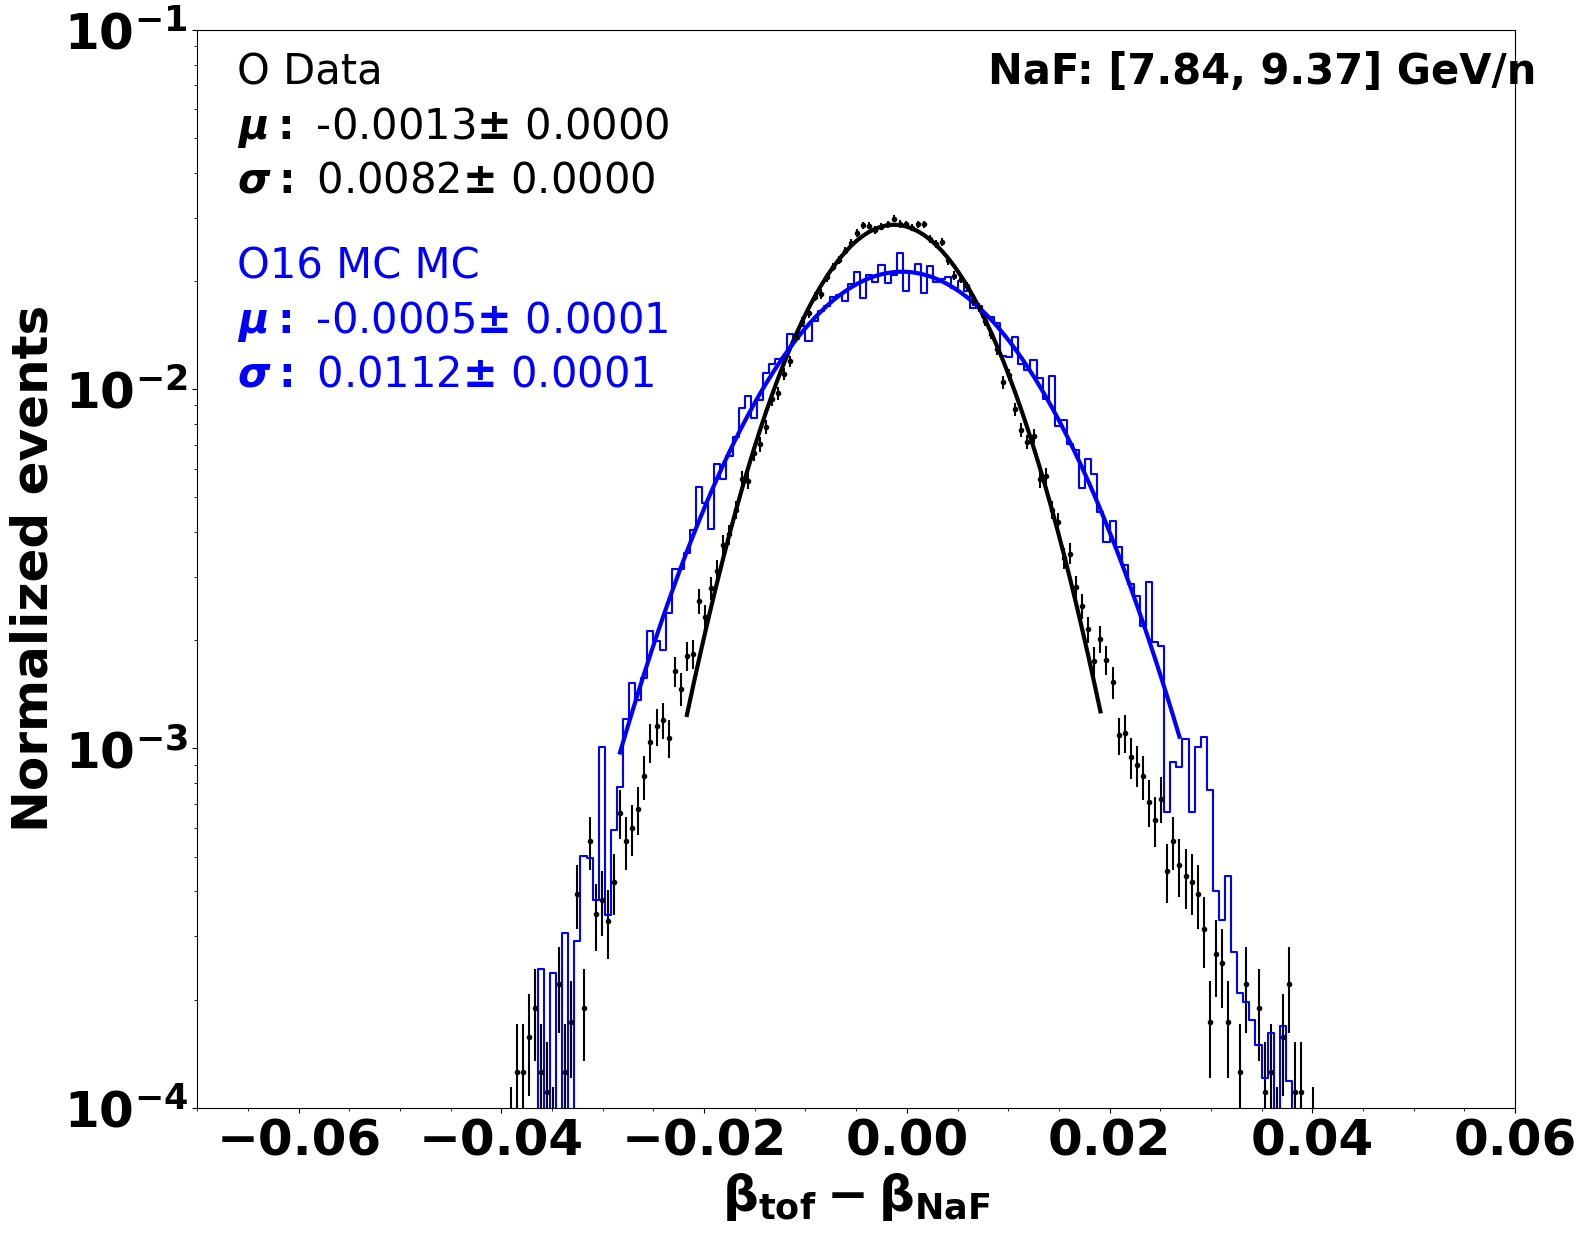

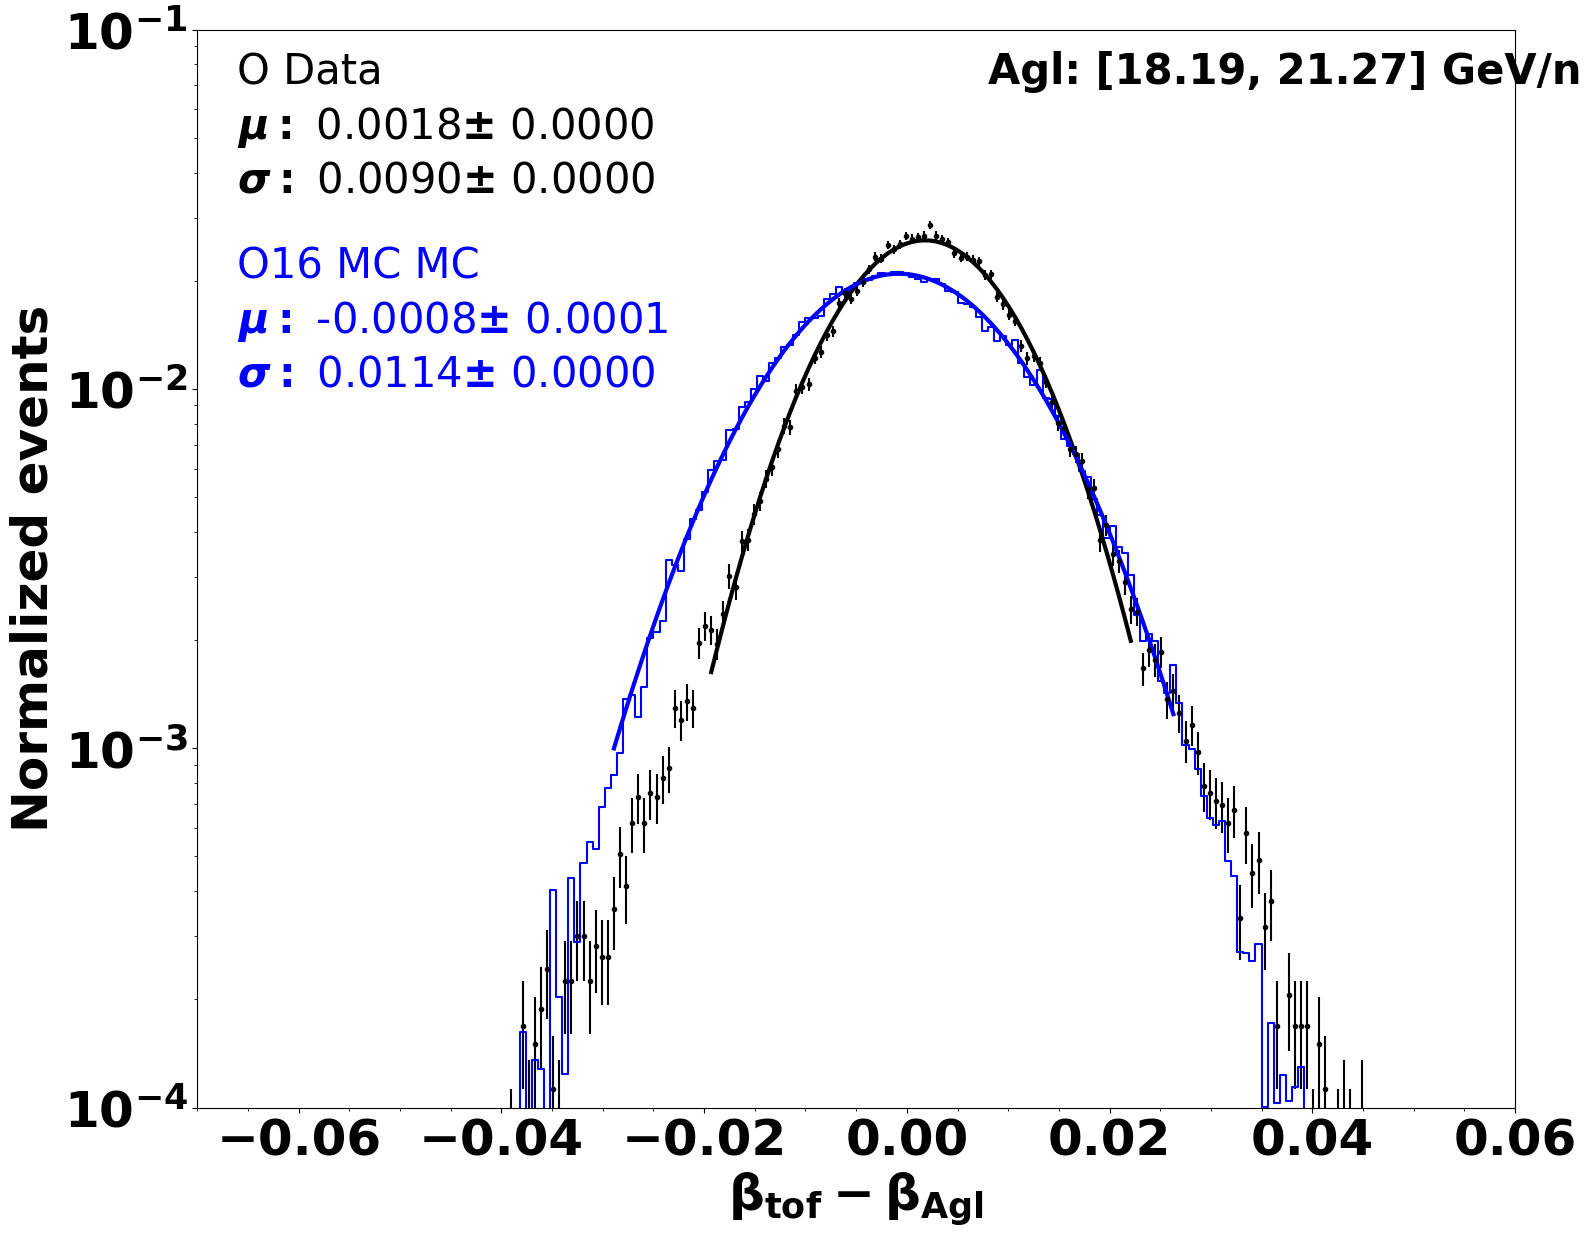

In [5]:
#minbin = {'NaF': 1, 'Agl': 10}
#maxbin = {'NaF': 40, 'Agl': 55}

minbin = {'NaF': 1, 'Agl': 6}
maxbin = {'NaF': 15, 'Agl': 20}

graph_mean_iss = dict()
graph_sigma_iss = dict()

graph_mean_mc = dict()
graph_sigma_mc = dict()
xrange = {'NaF':[-0.02, 0.03], 'Agl': [-0.01, 0.01]}
for dec in decs:
    energy_binvalues = hist2d_iss[dec].binnings[0].bin_centers[minbin[dec]:maxbin[dec]]
    graph_mean_iss[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_iss[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_mean_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mc[dec] = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin[dec], maxbin[dec])):
        hist1d_iss =  hist2d_iss[dec].project(ibin) 
        lowbinedge = hist2d_iss[dec].binnings[0].edges[ibin]
        upbinedge = hist2d_iss[dec].binnings[0].edges[ibin + 1]
        hist1d_iss = hist1d_iss * (1/np.sum(hist1d_iss.values))
        hist1d_mc = hist2d_mc[dec].project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
 
        xbinrange = hist1d_iss.binnings[0].get_indices(xrange[dec])
        xedges_iss = hist1d_iss.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_iss = hist1d_iss.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_iss = hist1d_iss.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_iss = np.sqrt(hist1d_iss.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_iss[yvalueserr_iss==0] = 0.0001
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
        guess_gaus_iss = dict(norm=0.0005, mu=0.01, sigma=0.005)
        guess_gaus_mc = dict(norm=0.0005, mu=0.01, sigma=0.01)
        #par_iss, parerr_iss = minuitfit_LL(yvalue_iss, xedges_iss , cumulative_norm_gaus, guess_gaus_iss)                                                                                                                  
        #par_mc, parerr_mc = minuitfit_LL(yvalue_mc, xedges_mc, cumulative_norm_gaus, guess_gaus_mc)  
        par_iss, parerr_iss = minuitfit_Chi(xvalue_iss, yvalue_iss, yvalueserr_iss, normalized_gaussian , guess_gaus_iss)
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        for key in guess_gaus_iss.keys():
            guess_gaus_iss[key] = par_iss[key]
            guess_gaus_mc[key] = par_mc[key]
    
        xrange_iter2 = [guess_gaus_iss['mu'] - 2.5 * guess_gaus_iss['sigma'], guess_gaus_iss['mu'] + 2.5 * guess_gaus_iss['sigma']]
        xbinrange2 = hist1d_iss.binnings[0].get_indices(xrange_iter2)
        xrange_iter2mc = [guess_gaus_mc['mu'] - 2.5 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.5 * guess_gaus_mc['sigma']]
        xbinrange2mc = hist1d_iss.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_iss = hist1d_iss.binnings[0].edges[xbinrange2[0]:xbinrange2[1]+1]
        xvalue_iss = hist1d_iss.binnings[0].bin_centers[xbinrange2[0]:xbinrange2[1]]
        yvalue_iss = hist1d_iss.values[xbinrange2[0]:xbinrange2[1]]
        yvalueserr_iss = np.sqrt(hist1d_iss.squared_values[xbinrange2[0]:xbinrange2[1]])
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        par_iss, parerr_iss = minuitfit_Chi(xvalue_iss, yvalue_iss, yvalueserr_iss, normalized_gaussian , guess_gaus_iss)
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        #par_iss, parerr_iss = minuitfit_LL(yvalue_iss, xedges_iss , cumulative_norm_gaus, guess_gaus_iss)  
        #par_mc, parerr_mc = minuitfit_LL(yvalue_mc, xedges_mc , cumulative_norm_gaus, guess_gaus_mc)  
        #print("iss iter2:", par_iss) 
        #print("mc iter2:", par_mc) 
        graph_mean_iss[dec].yvalues[ip] = par_iss['mu']
        graph_mean_iss[dec].yerrs[ip] = parerr_iss['mu']
        graph_sigma_iss[dec].yvalues[ip] = abs(par_iss['sigma'])
        graph_sigma_iss[dec].yerrs[ip] = parerr_iss['sigma']
        graph_mean_mc[dec].yvalues[ip] = par_mc['mu']
        graph_mean_mc[dec].yerrs[ip] = parerr_mc['mu']
        graph_sigma_mc[dec].yvalues[ip] = par_mc['sigma']
        graph_sigma_mc[dec].yerrs[ip] = parerr_mc['sigma']
    
        fit_y_iss = normalized_gaussian(xvalue_iss, *par_iss)                                                                                                                                                              
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    
        draw= False
        if ip==11:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_iss, style="iss", color=isscolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_iss, fit_y_iss, '-', linewidth=3, color='black')
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.6, 0.98, f"{dec}: [{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
            ax1.text(0.03, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.text(0.03, 0.93, f"$\\mu:$ {par_iss['mu']:.4f}$\\pm$ {parerr_iss['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.text(0.03, 0.88, f"$\\sigma:$ {par_iss['sigma']:.4f}$\\pm$ {parerr_iss['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
            ax1.set_ylim([0.0001, 0.1])
    
            ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(rf'$\mathrm{{\beta_{{tof}}-\beta_{{ {dec} }}}}$')
            ax1.set_xlim([-0.07, 0.06])
            ax1.set_yscale('log')
        
            #plt.show(False)
            savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}{dec}_100GeVn", show=True) 


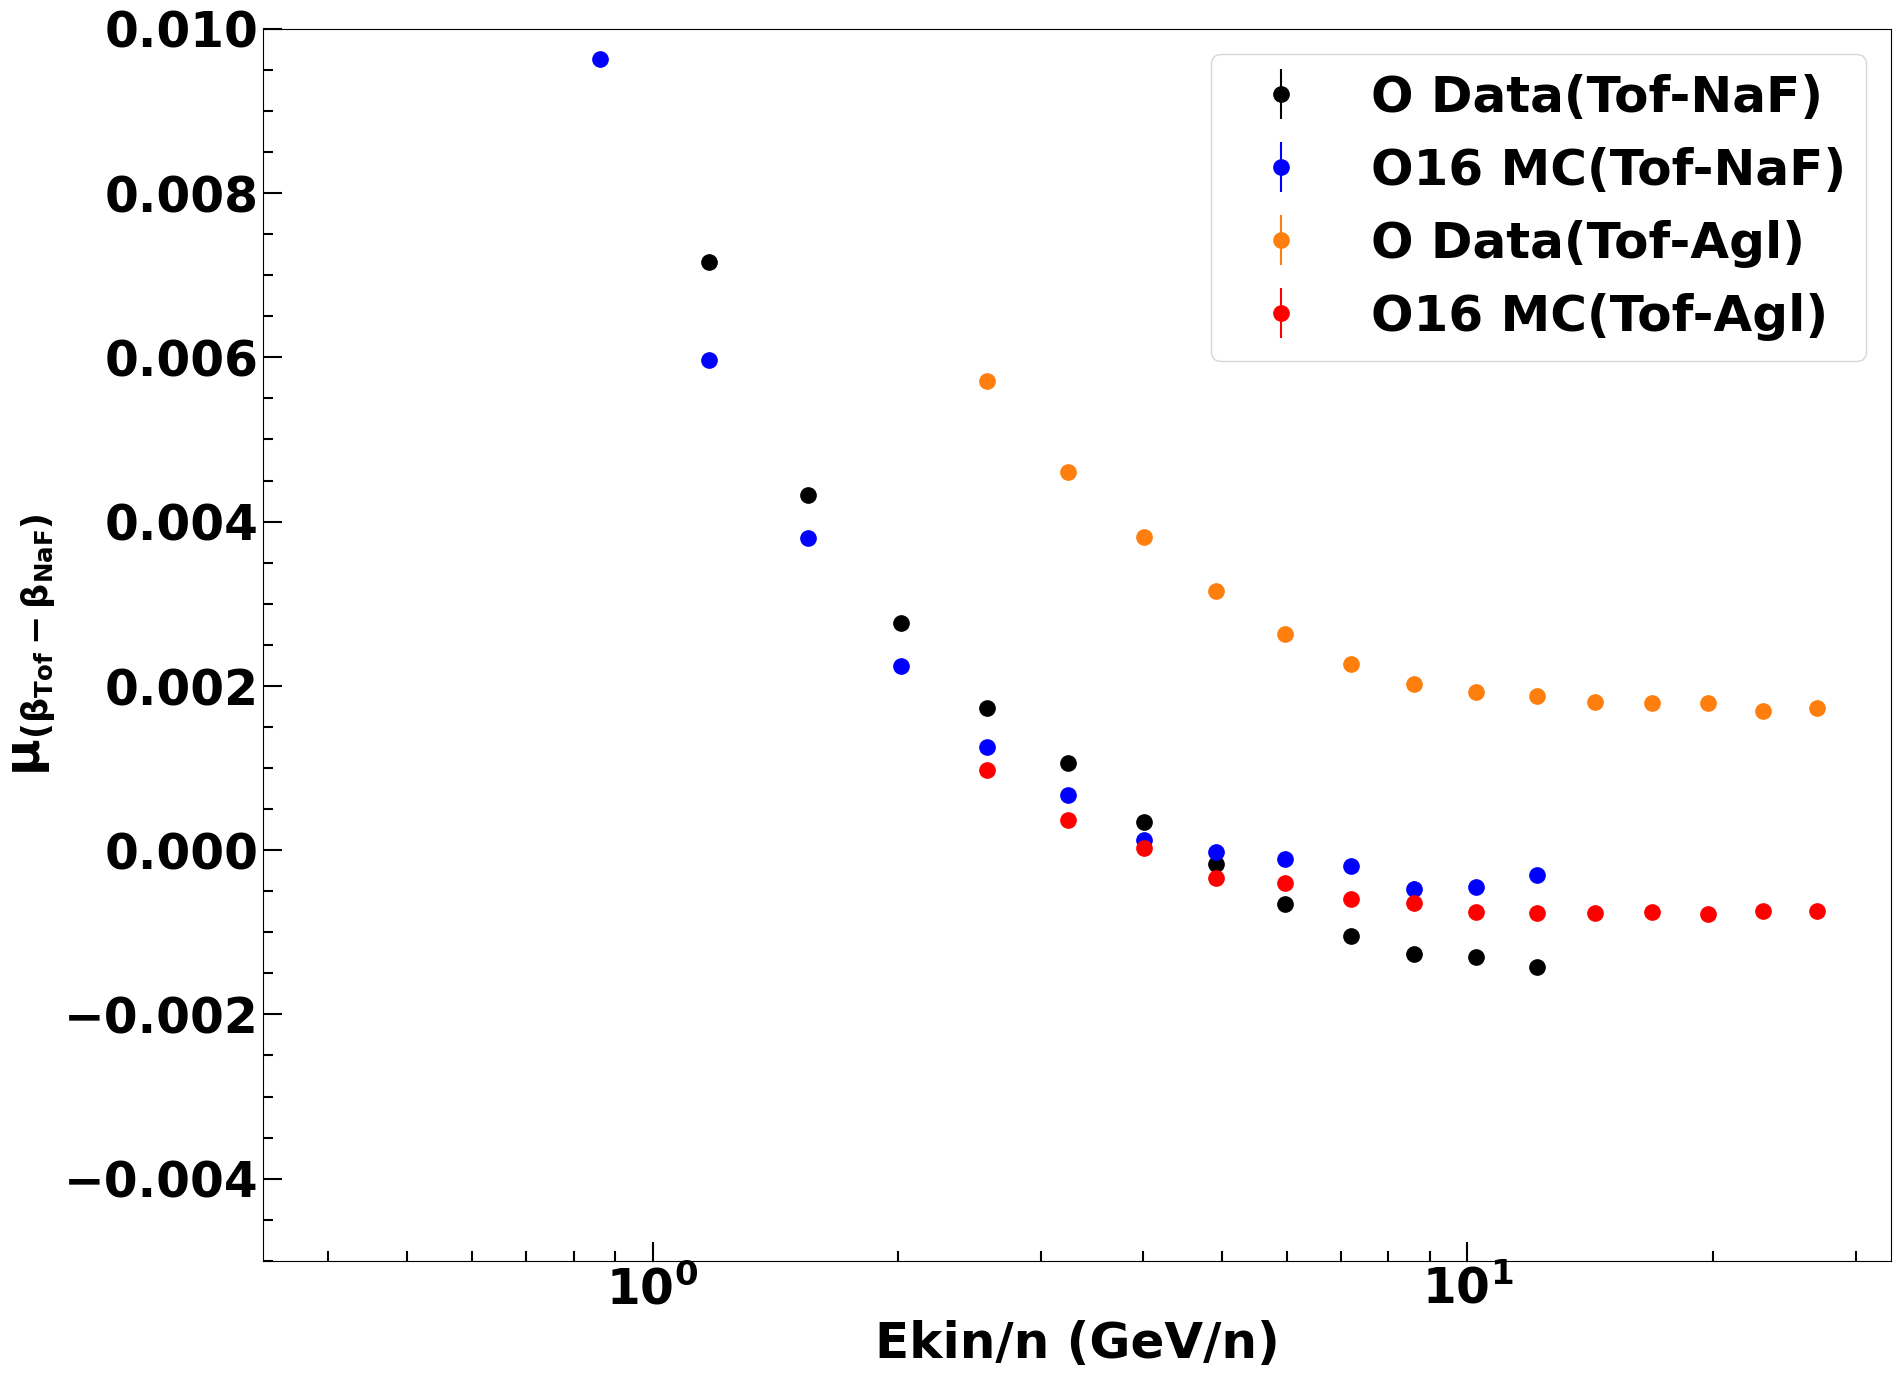

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
isscol = {'NaF': 'black', 'Agl': 'tab:orange'}
mccol = {'NaF': 'blue', 'Agl': 'red'}
for dec in decs:
    plot_graph(fig, ax1, graph_mean_iss[dec], color=isscol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data(Tof-{dec})') 
    plot_graph(fig, ax1, graph_mean_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName}(Tof-{dec})')  
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel(r'$\mathrm{\mu_{(\beta_{Tof} - \beta_{NaF})}}$')
    ax1.legend()
    #ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
    #ax1.text(0.7, 0.94, f'{MCName}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')
    ax1.set_ylim([-0.005, 0.01])
    savefig_tofile(fig, plotfile, f"graph_mean_{figsuffix}_{nuclei}_rebin", show=True) 


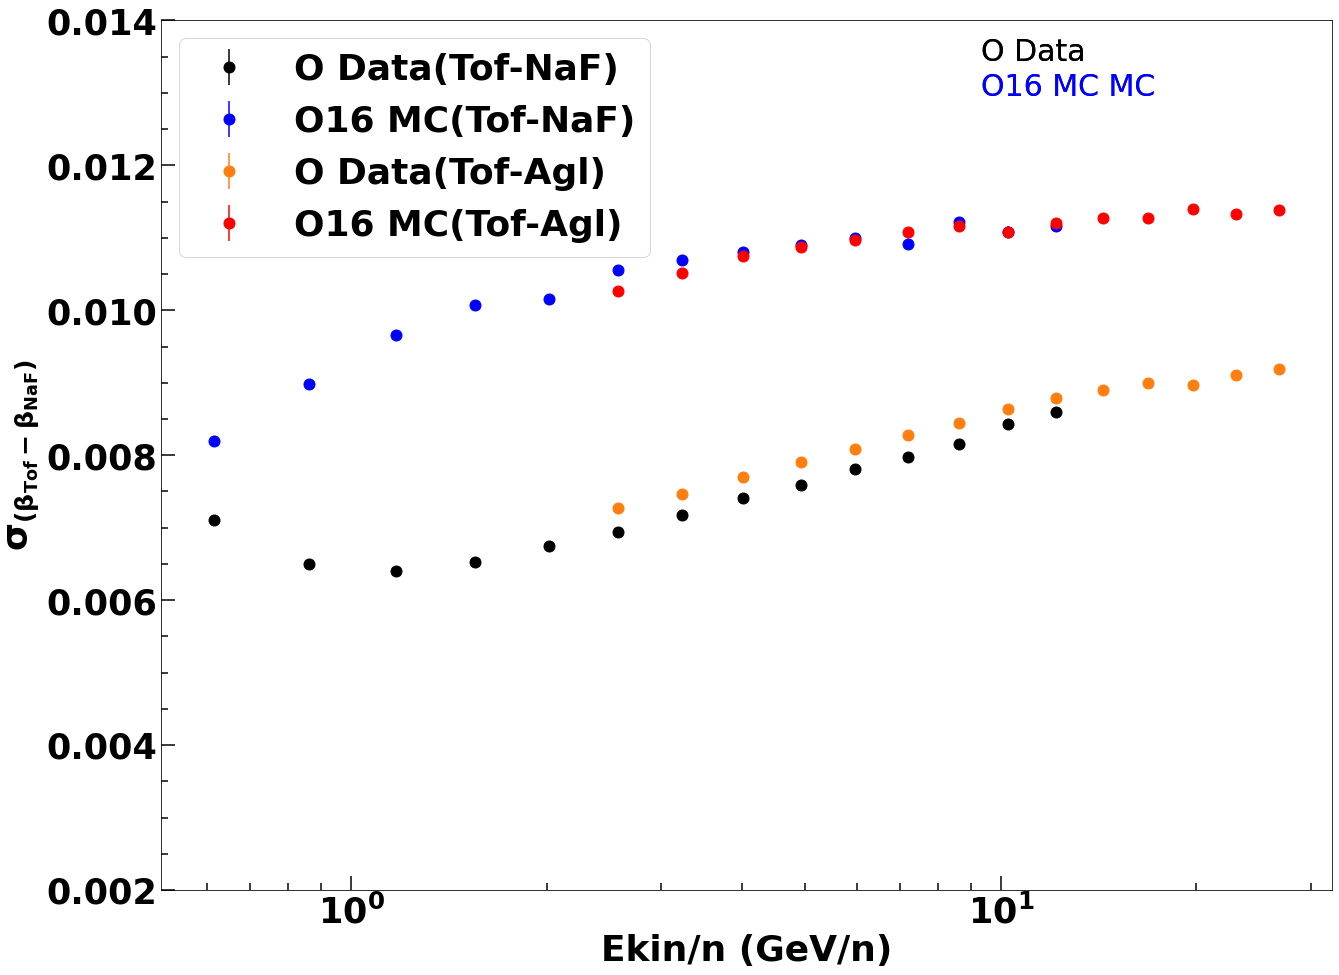

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))

for dec in decs:
    plot_graph(fig, ax1, graph_sigma_iss[dec], color=isscol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data(Tof-{dec})') 
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName}(Tof-{dec})')  
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{NaF})}}$')
    ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
    ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
    ax1.set_ylim([0.002, 0.014])
    ax1.legend()
    savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_finebin", show=True) 

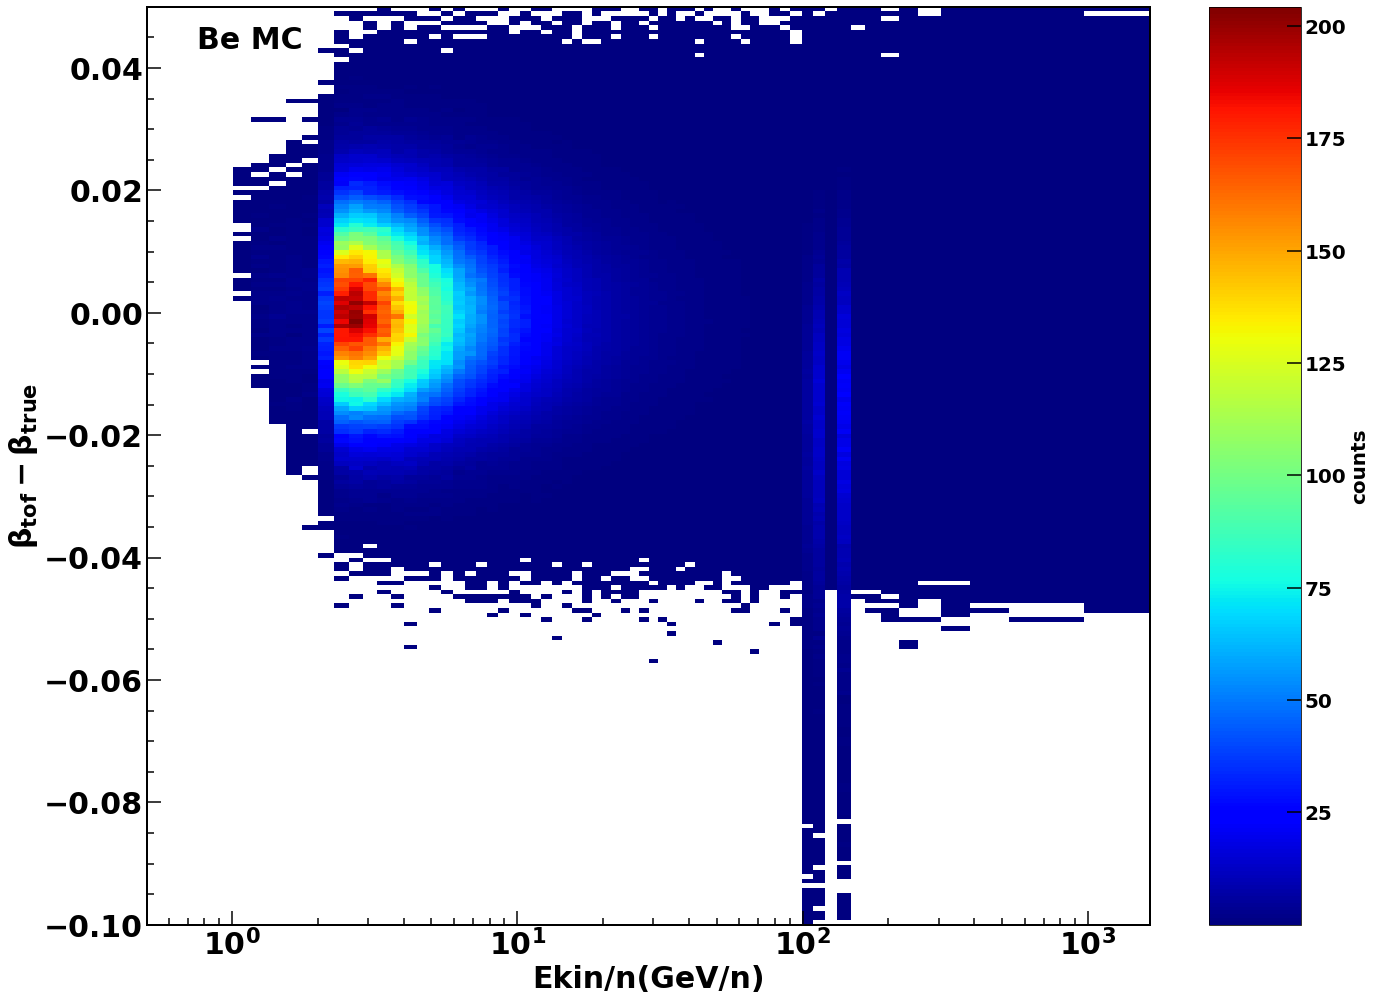

In [48]:
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1_refTrueBeta_B1236P8_mcweight.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Reso.npz'
file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtRICH_B1236P8_mcweight_Agl_finebin.npz'
#file_tofbeta = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
datatype = {'iss', 'mc'}
refGeo = 'A0'

with np.load(f'{file_tofbeta}') as npzfile:
    hist2d_mc_tofTrue = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
    fig = plt.figure(figsize=(20, 15))
    plot = fig.subplots(1, 1) 
    plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrue.binnings[0].edges[1:-1], 
               ybinning=hist2d_mc_tofTrue.binnings[1].edges[1:-1], 
               counts=hist2d_mc_tofTrue.values[1:-1, 1:-1], 
               xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
               setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
    plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
    plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
    plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
    plot.set_xscale('log')
    #plot.set_xlim(gammalim[dec])
    savefig_tofile(fig, plotfile, f"hist2d_O16MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

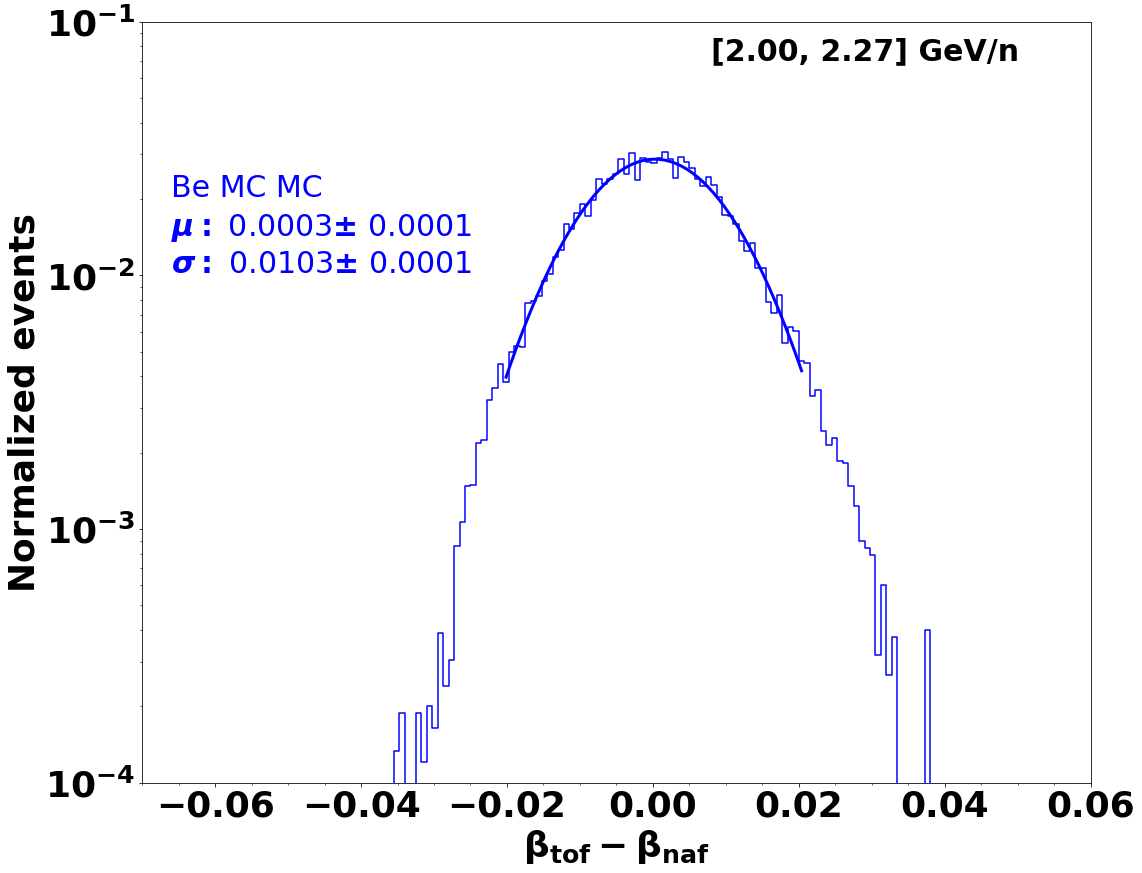

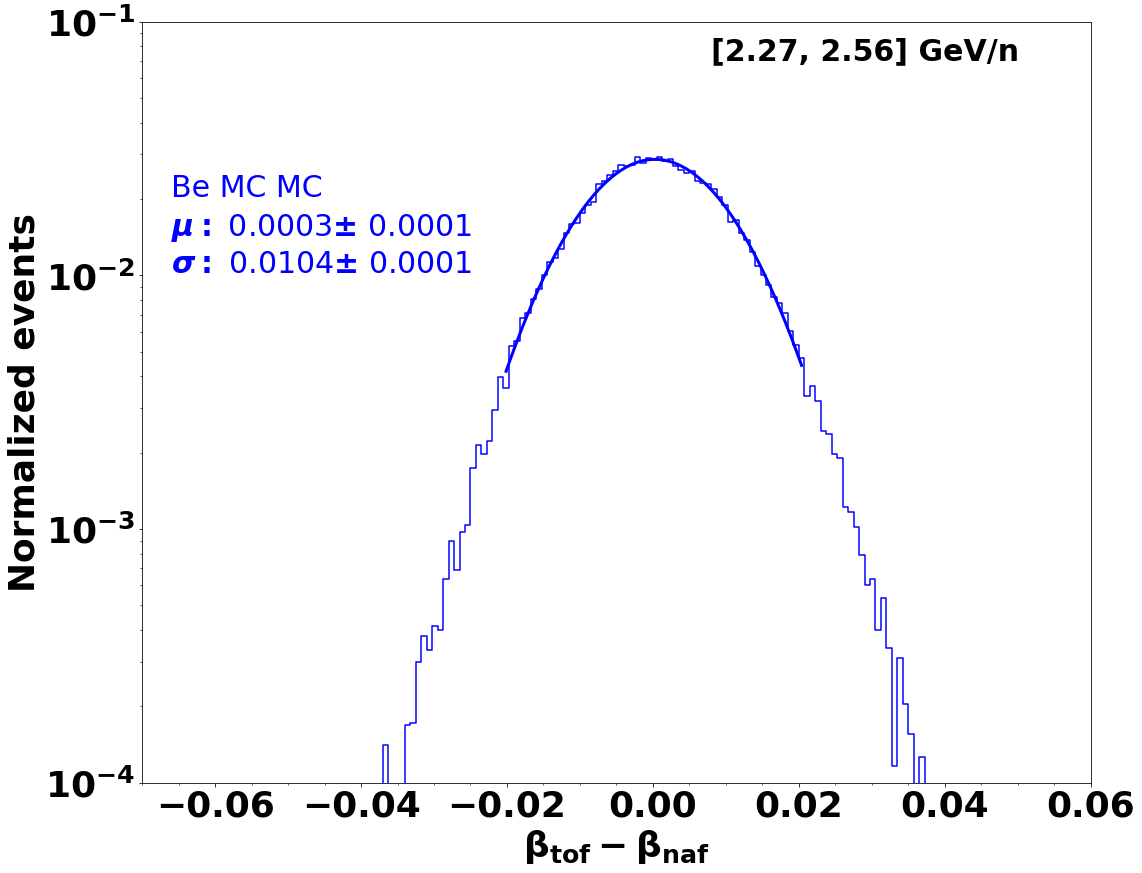

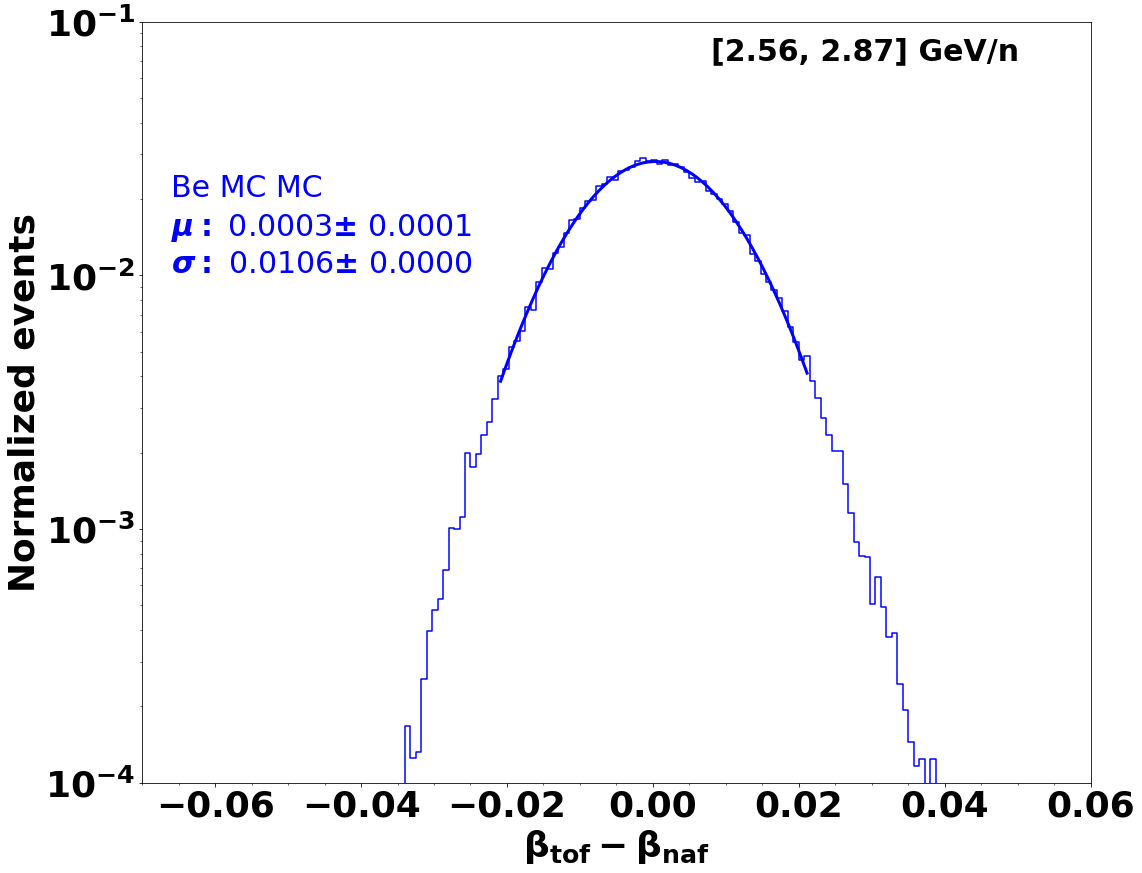

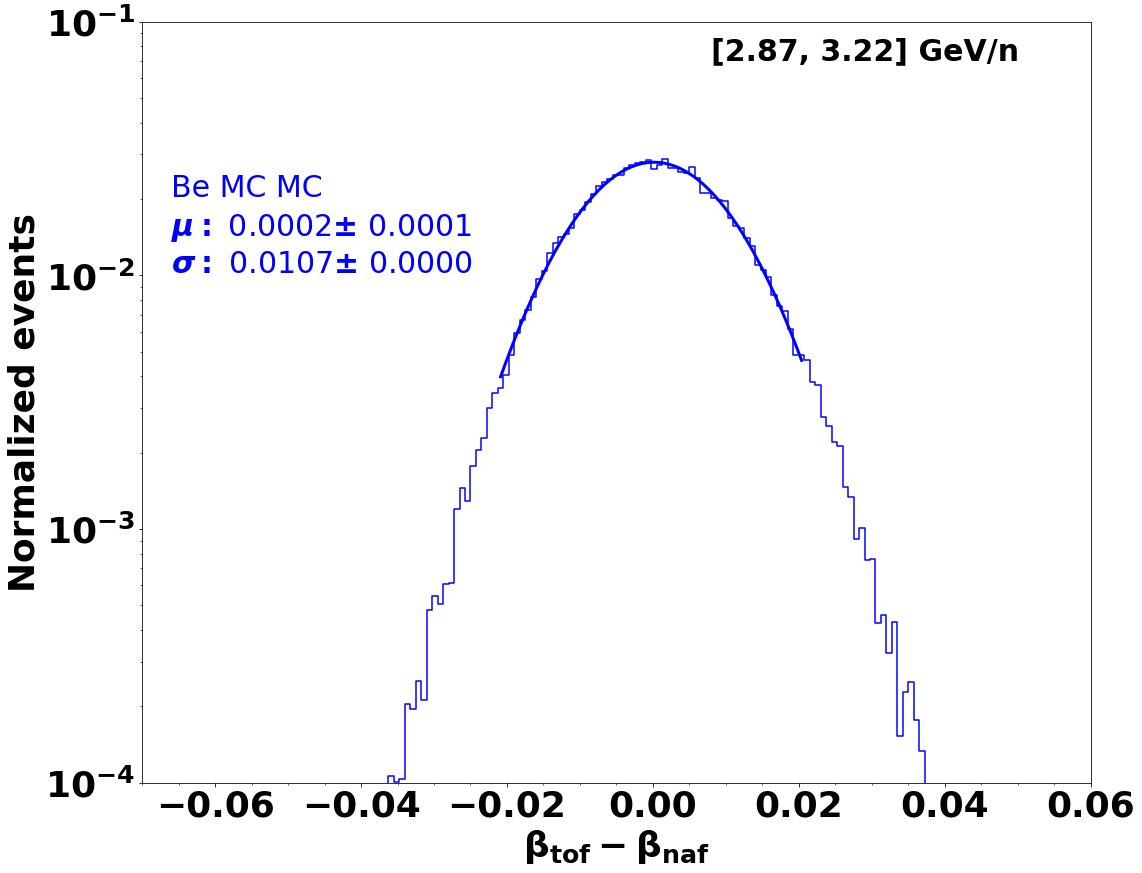

In [50]:
minbin = 10
maxbin = 50
energy_binvalues = hist2d_mc_tofTrue.binnings[0].bin_centers[minbin:maxbin]
graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

for ip, ibin in enumerate(range(minbin, maxbin)):
   
    lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
    upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
    hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
    hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
    xrange = [-0.06, 0.03]
    xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
    yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
    guess_gaus_mc = dict(norm=0.0005, mu=0.001, sigma=0.007)

    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
    for key in guess_gaus_mc.keys():
        guess_gaus_mc[key] = par_mc[key]
    
    xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
    xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
    xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
    xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
    yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
    yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
    par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

    graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
    graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
    graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
    graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
    fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
    draw = False
    plotp = [0, 1, 2, 3, 60, 61]
    if ip in plotp:
        figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
        plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
        #ax1.legend()
        ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
        ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
   
        ax1.set_ylim([0.0001, 0.1])
    
        ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
        ax1.set_ylabel('Normalized events')
        ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
        ax1.set_xlim([-0.07, 0.06])
        ax1.set_yscale('log')
        savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}_A0", show=True) 
    


{'NaF': <tools.graphs.MGraph object at 0x7f6cc390be20>, 'Agl': <tools.graphs.MGraph object at 0x7f6cc3e31000>}


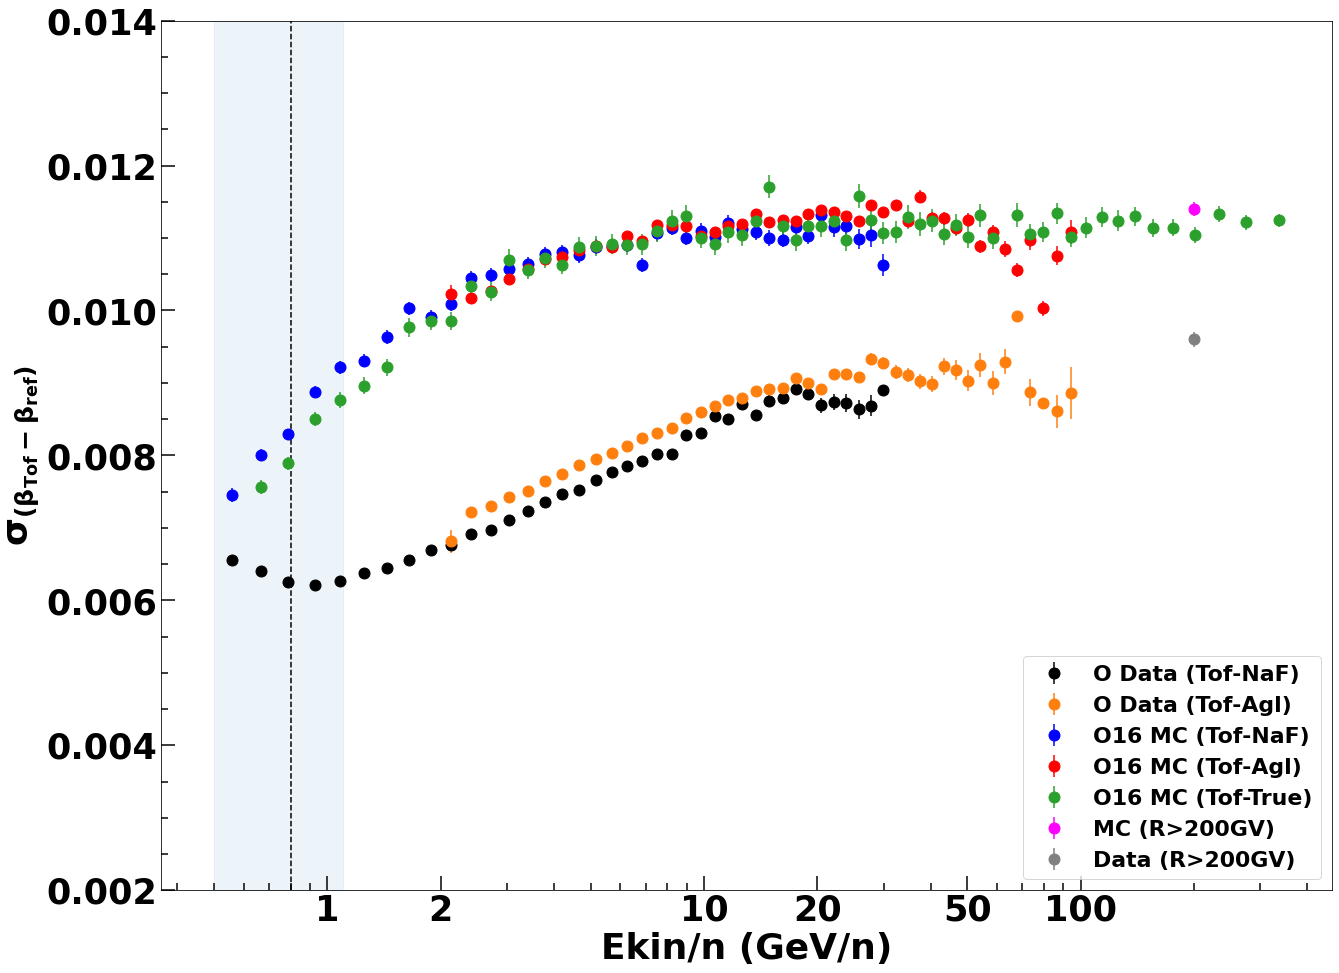

In [58]:

graph_sigma_mchighR = MGraph([200], [0.0114],  [0.0001])
graph_sigma_isshighR = MGraph([200], [0.0096], [0.0001])
graph_sigma_highR_ratio = graph_sigma_isshighR/graph_sigma_mchighR
graph_sigma_datamcratio = {}

print(graph_sigma_mc)
fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for dec in decs:
    plot_graph(fig, ax1, graph_sigma_iss[dec], color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data (Tof-{dec})') 
for dec in decs:
    graph_sigma_datamcratio[dec] = graph_sigma_iss[dec]/graph_sigma_mc[dec]
    plot_graph(fig, ax1, graph_sigma_mc[dec], color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-{dec})')  

    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-True)') 
graph_sigma_datamcratio_highR = graph_sigma_isshighR/graph_sigma_mchighR
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 
ax1.set_xlabel('Ekin/n (GeV/n)')

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')


#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.002, 0.014])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks

ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.5, 1.1, alpha=0.08, color="tab:blue")
ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.legend(loc='lower right', fontsize=22)
#ax2.axhline(y=0.8, color='black', linestyle='--')
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_TrueAtRICH_{refGeo}Geo_finebin", show=True) 







[0.85201137 0.79911776 0.75806259 0.72626317 0.7023397  0.68494107
 0.67273833 0.66486498 0.66049276 0.6590088  0.6599128  0.66273261
 0.66708675 0.67267119 0.67918503 0.68640889 0.69415666 0.70222073
 0.7105927  0.71884677 0.72687573 0.7349328  0.74286134 0.75052511
 0.75780964 0.76462183 0.77088838 0.77670189 0.78194481 0.78642645
 0.7902179  0.79326216 0.79551931 0.79698278 0.79759244 0.7973072
 0.79610225 0.79393025 0.79075996]
[0.68538806 0.6924267  0.69917045 0.70566155 0.71192872 0.71795042
 0.7237525  0.72935301 0.73473531 0.73999598 0.7449589  0.74964427
 0.75426135 0.75877141 0.76314658 0.76736774 0.77142271 0.7753046
 0.77911097 0.78281158 0.78630407 0.78967079 0.79289973 0.79598345
 0.79897043 0.80184318 0.80458956 0.80720172 0.8097086  0.81209749
 0.81435995 0.81651424 0.81857047 0.82051446 0.82233652 0.82404438
 0.82564132 0.8271274  0.82853499 0.82980018 0.83092159 0.83194891
 0.83289246 0.83370349 0.83434631]


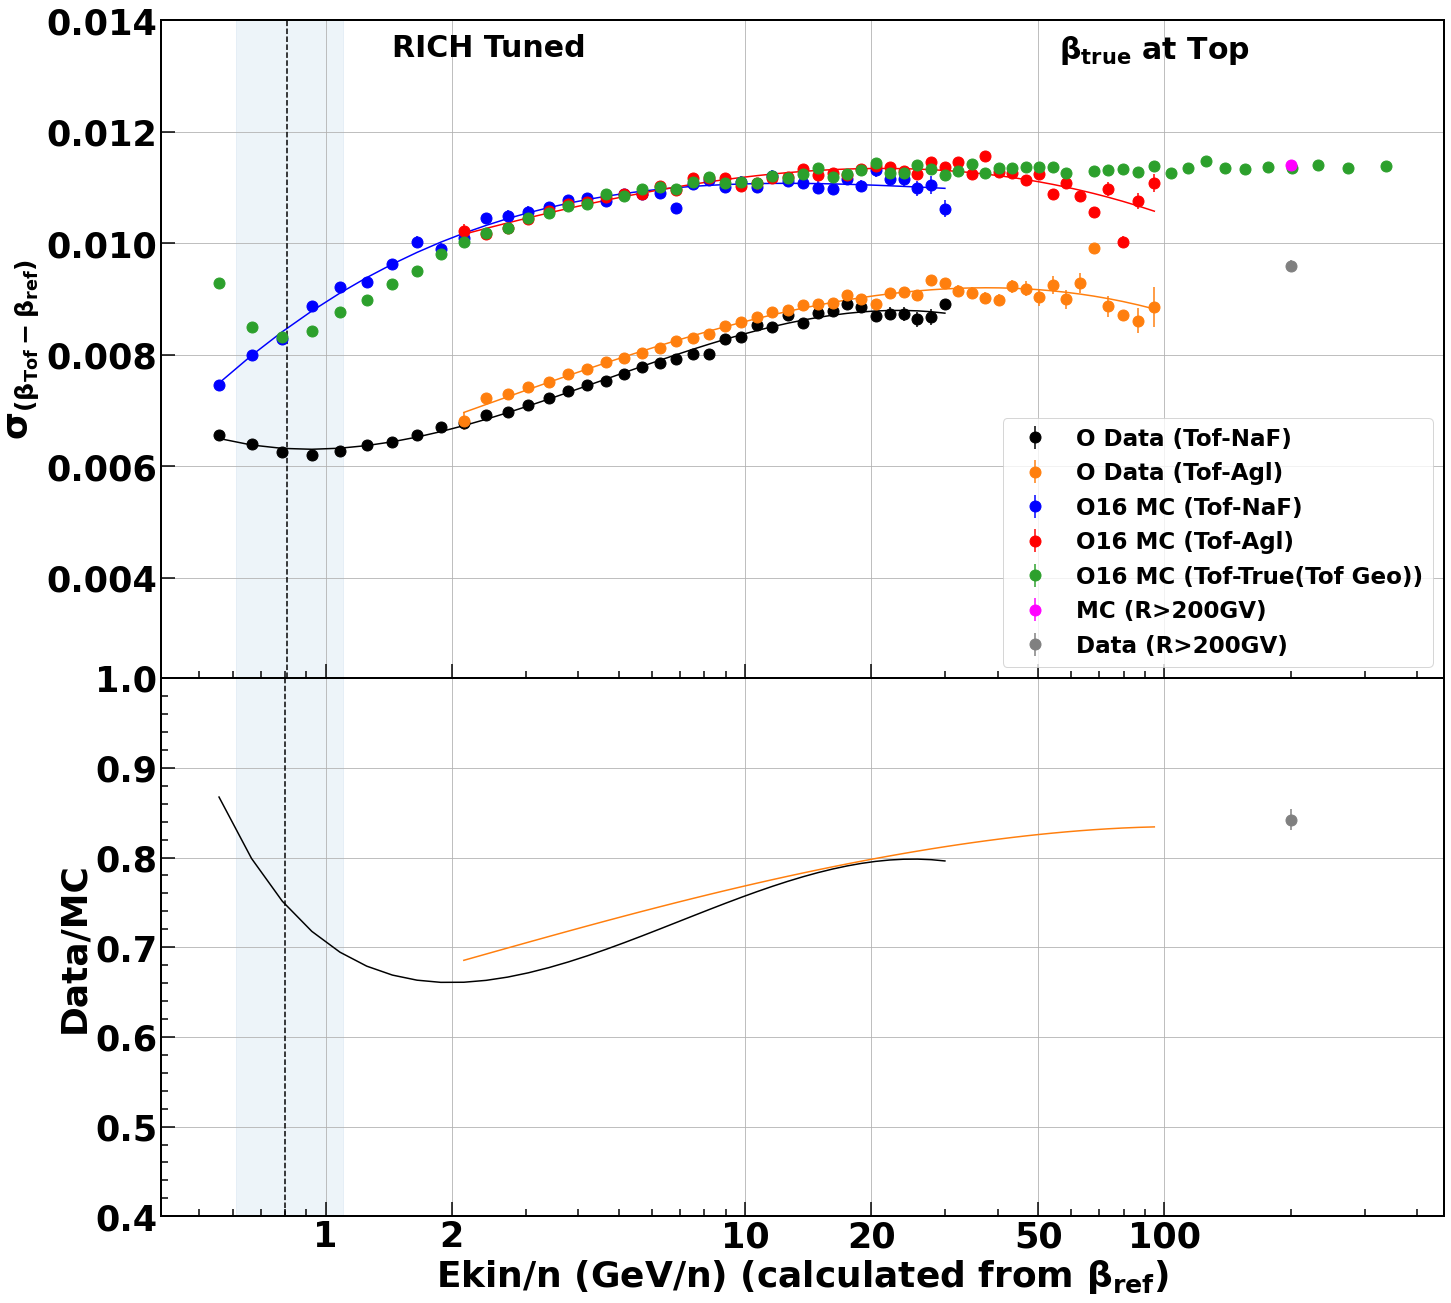

In [106]:
from tools.utilities import save_spline_to_file
from scipy.interpolate import interp1d, UnivariateSpline

def set_plotstyle(ax1, ax2):
    plt.subplots_adjust(hspace=.0)   
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    ax1.set_xticklabels([])
    
def getpolyfit(agraph, p0):
    popt, pcov = curve_fit(poly, np.log(agraph.xvalues), agraph.yvalues, p0 = p0)
    polypars = uncertainties.correlated_values(popt, np.array(pcov)) 
    yfit, yfiterr = get_fitpdf_witherr(np.log(agraph.xvalues), polypars, upoly)
    graph_fit = MGraph(agraph.xvalues, yfit, yfiterr)
    return graph_fit, polypars
       
graphfit_sigma_iss = {}
polypars_iss = {}
graphfit_sigma_mc = {}
polyfitrange = {'NaF': [0.6, 30], 'Agl':[2, 100]}
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.55, 0.45]}, figsize=(23, 22)) 
set_plotstyle(ax1, ax2)
for dec in decs:
    slicegraph_iss = slice_graph_by_value(graph_sigma_iss[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_iss, color=isscol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{nuclei} Data (Tof-{dec})')
    graphfit_sigma_iss[dec], polypars_iss[dec] = getpolyfit(slicegraph_iss, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_iss[dec], color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
for dec in decs:
    slicegraph_mc = slice_graph_by_value(graph_sigma_mc[dec], polyfitrange[dec])
    plot_graph(fig, ax1, slicegraph_mc, color=mccol[dec],  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-{dec})')  
    graphfit_sigma_mc[dec], polypars_mc[dec] = getpolyfit(slicegraph_mc, p0=[1.0, 0.1, 0.1, 0.1])
    plot_graph(fig, ax1, graphfit_sigma_mc[dec], color=mccol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22)
    
plot_graph(fig, ax1, graph_sigma_mcTofTrueReso, color='tab:green',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'{MCName} MC (Tof-True(Tof Geo))') 
plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (R>200GV)') 
plot_graph(fig, ax1, graph_sigma_isshighR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data (R>200GV)') 

ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{ref})}}$')

graphfit_sigma_datamcratio = {}
graphfit_sigma_datamcratio_lowlimit = {}
graphfit_sigma_datamcratio_uplimit = {}
spline_tofbeta_sigmacorrecton = {} 
for dec in decs:
    graphfit_sigma_datamcratio = graphfit_sigma_iss[dec]/graphfit_sigma_mc[dec]
    #slicegraph_ratio = slice_graph_by_value(graph_sigma_datamcratio[dec], [0.83, 500])
    
    plot_graph(fig, ax2, graphfit_sigma_datamcratio, color=isscol[dec],  style="hist", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC({refGeo}-{dec})') 
    spline_tofbeta_sigmacorrecton[dec] = UnivariateSpline(np.log(graphfit_sigma_datamcratio.xvalues), graphfit_sigma_datamcratio.yvalues, k=3, s=5) 
    save_spline_to_file(spline_tofbeta_sigmacorrecton[dec], datadir, "spline_tofbeta_sigmakorr.pickle")
    
    print(spline_tofbeta_sigmacorrecton[dec](np.log(graphfit_sigma_datamcratio.xvalues)))
    

plot_graph(fig, ax2, graph_sigma_highR_ratio, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC(R>200GV)') 
#ax2.plot(graphfit_sigma_iss['NaF'].xvalues,spline_tofbeta_sigmacorrecton['Agl'](np.log(graphfit_sigma_iss['NaF'].xvalues)), '--', color='tab:orange')
    
    
#np.savez(os.path.join(datadir,'spline_tofbeta_sigmakorr.npz'), sigmakorr_NaF=spline_tofbeta_sigmacorrecton['NaF'], sigmakorr_Agl=spline_tofbeta_sigmacorrecton['Agl'])

#plot_graph(fig, ax2, graph_sigma_datamcratio_highR, color='grey',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'Data/MC (R>200GV)')
#ax1.text(0.7, 0.98, f'{nuclei} Data', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=isscolor, weight='normal')  
#ax1.text(0.7, 0.94, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
ax1.set_ylim([0.0022, 0.014])
ax1.set_xscale('log')
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)

ax2.set_ylim([0.4, 1.0])
ax2.set_xscale('log')
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_labels)

ax1.axvline(x=0.81, color='black', linestyle='--')
ax2.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax2.fill_betweenx(np.linspace(0.4, 1.0, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax1.legend(loc='lower right', fontsize=23)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax2.set_ylabel('Data/MC')
ax1.sharex(ax2)
ax2.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{ref}}$)')
ax1.grid()
ax2.grid()
ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ Top}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.18, 0.98, f"RICH {figtext}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}all_RICHNotTunedV5_TrueAtRICH_{refGeo}Geo_finebin", show=True) 


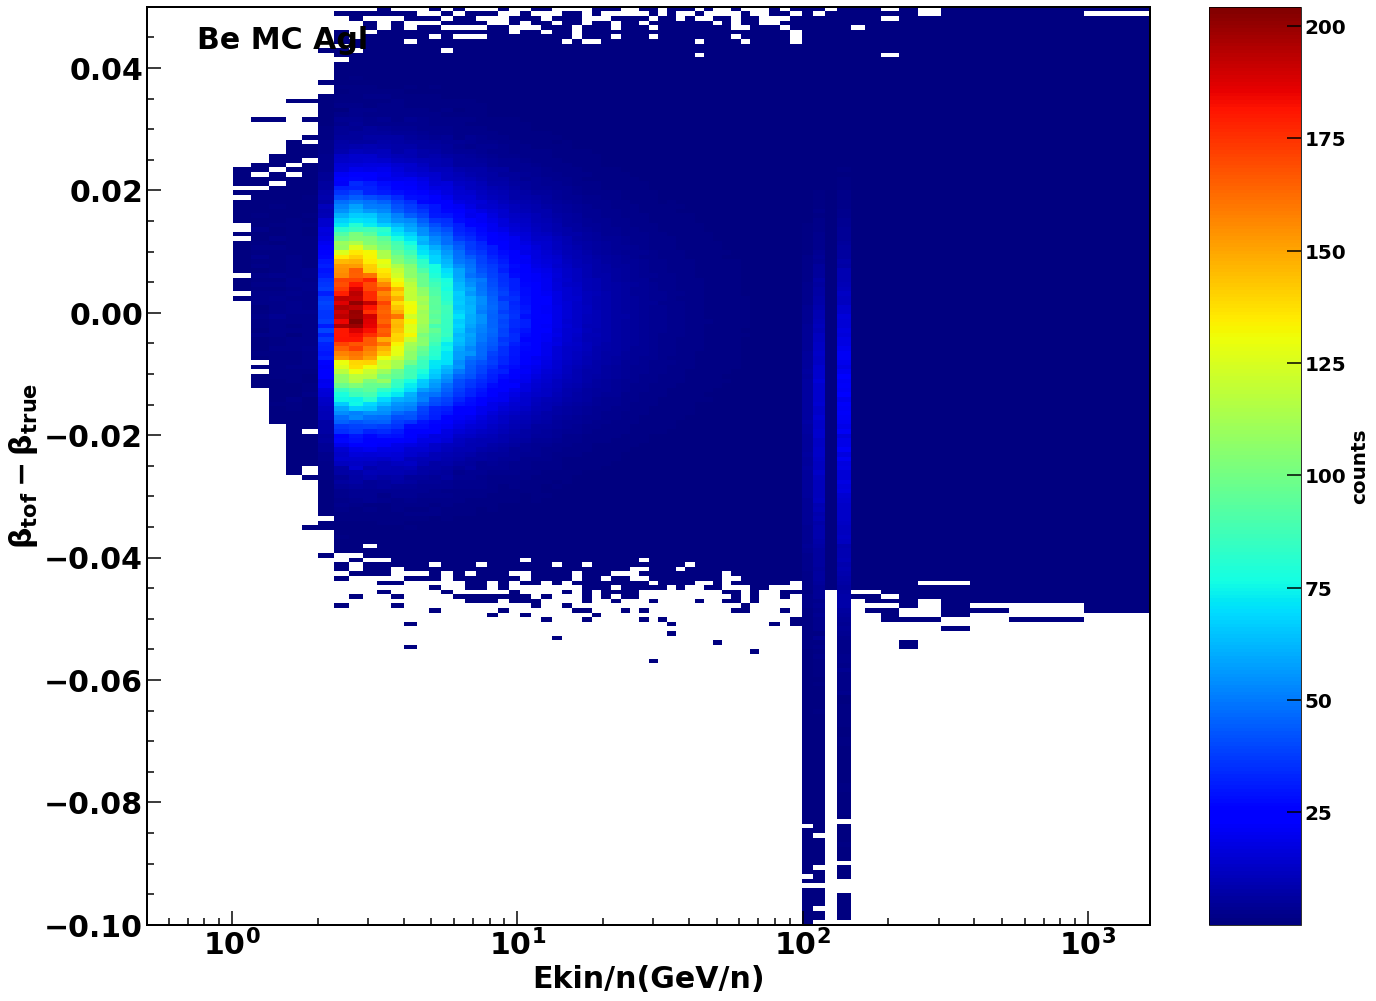

In [30]:
#file_tofbeta1 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_NaF_finebin.npz'
file_tofbeta2 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBeta_B1236P8_mcweight_Agl_finebin.npz'
file_tofbeta1 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/O_tofbeta1Residual_refTrueBetaAtInnTrk_B1236P8_mcweight_finebin.npz'
                                                                
file_tofbeta3 = '/home/manbing/Documents/Data/data_BeP8/TofBeta/Be_tofbeta1Residual_refTrueBetaAtRICH_B1236P8_mcweight_Agl_finebin.npz'

datatype = {'iss', 'mc'}
#refGeos = {'Tof', 'NaF', 'Agl'}
refGeos = {'Agl'}
file_tofbeta = {'Tof': file_tofbeta1,
               'NaF': file_tofbeta2,
               'Agl':file_tofbeta3}

hist2d_mc_tofTrueGeo = {}
for refGeo in refGeos:
    with np.load(f'{file_tofbeta[refGeo]}') as npzfile:
        hist2d_mc_tofTrueGeo[refGeo] = WeightedHistogram.from_file(npzfile, f"hist_mcbetareso_mix_Tof")  
    
        fig = plt.figure(figsize=(20, 15))
        plot = fig.subplots(1, 1) 
        plot2dhist(fig, plot, xbinning=hist2d_mc_tofTrueGeo[refGeo].binnings[0].edges[1:-1], 
                   ybinning=hist2d_mc_tofTrueGeo[refGeo].binnings[1].edges[1:-1], 
                   counts=hist2d_mc_tofTrueGeo[refGeo].values[1:-1, 1:-1], 
                   xlabel=None, ylabel=None, zlabel="counts", zmin=None, zmax=None, 
                   setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False,  setlogz=False)  
        plot.text(0.05, 0.98, f"{nucleiname[nuclei]} MC {refGeo}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=plot.transAxes, color="black", fontweight="bold")          
        plot.set_xlabel(r"Ekin/n(GeV/n)", fontsize=30)                                                                                                                                                     
        plot.set_ylabel(r'$\mathrm{\beta_{tof} - \beta_{true}}$', fontsize=30)
        plot.set_xscale('log')
        #plot.set_xlim(gammalim[dec])
        savefig_tofile(fig, plotfile, f"hist2d_{nuclei}MC_betaResidual_{refGeo}Geo", show=True) 
 
  
                   

In [31]:
def get_musigma_gausfit(hist2d_mc_tofTrue, minbin, maxbin):
    energy_binvalues = hist2d_mc_tofTrue.binnings[0].bin_centers[minbin:maxbin]
    graph_mean_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))
    graph_sigma_mcTofTrueReso = MGraph(energy_binvalues, np.zeros_like(energy_binvalues), yerrs=np.zeros_like(energy_binvalues))

    for ip, ibin in enumerate(range(minbin, maxbin)):
   
        lowbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin]
        upbinedge = hist2d_mc_tofTrue.binnings[0].edges[ibin + 1]
        hist1d_mc = hist2d_mc_tofTrue.project(ibin) 
        hist1d_mc = hist1d_mc * (1/np.sum(hist1d_mc.values))
    
        xrange = [-0.03, 0.03]
        xbinrange = hist1d_mc.binnings[0].get_indices(xrange)
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange[0]:xbinrange[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange[0]:xbinrange[1]]
        yvalue_mc = hist1d_mc.values[xbinrange[0]:xbinrange[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange[0]:xbinrange[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
   
        guess_gaus_mc = dict(norm=0.0005, mu=0.0005, sigma=0.007)

        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)
        for key in guess_gaus_mc.keys():
            guess_gaus_mc[key] = par_mc[key]
    
        xrange_iter2mc = [guess_gaus_mc['mu'] - 2.0 * guess_gaus_mc['sigma'], guess_gaus_mc['mu'] + 2.0 * guess_gaus_mc['sigma']]
        xbinrange2mc = hist1d_mc.binnings[0].get_indices(xrange_iter2mc)
    
        xedges_mc = hist1d_mc.binnings[0].edges[xbinrange2mc[0]:xbinrange2mc[1]+1]
        xvalue_mc = hist1d_mc.binnings[0].bin_centers[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalue_mc = hist1d_mc.values[xbinrange2mc[0]:xbinrange2mc[1]]
        yvalueserr_mc = np.sqrt(hist1d_mc.squared_values[xbinrange2mc[0]:xbinrange2mc[1]])
        yvalueserr_mc[yvalueserr_mc==0] = 0.0001
    
        par_mc, parerr_mc = minuitfit_Chi(xvalue_mc, yvalue_mc, yvalueserr_mc,normalized_gaussian, guess_gaus_mc)

        graph_mean_mcTofTrueReso.yvalues[ip] = par_mc['mu']
        graph_mean_mcTofTrueReso.yerrs[ip] = parerr_mc['mu']
        graph_sigma_mcTofTrueReso.yvalues[ip] = par_mc['sigma']
        graph_sigma_mcTofTrueReso.yerrs[ip] = parerr_mc['sigma']
                                                                                                                                                            
        fit_y_mc = normalized_gaussian(xvalue_mc, *par_mc) 
        draw = False
        plotp = [0, 1, 2, 3, 60, 61]
        if draw:
            figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
            plot_histogram_1d(ax1, hist1d_mc, style="mc", color=mccolor, label=None, scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False) 
            #ax1.legend()
            ax1.plot(xvalue_mc, fit_y_mc, '-', linewidth=3, color='blue')
            ax1.text(0.6, 0.98, f"[{lowbinedge:.2f}, {upbinedge:.2f}] GeV/n", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold") 
       
            ax1.set_ylim([0.0001, 0.1])
        
            ax1.text(0.03, 0.8, f'{MCName} MC', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.75, f"$\\mu:$ {par_mc['mu']:.4f}$\\pm$ {parerr_mc['mu']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.text(0.03, 0.7, f"$\\sigma:$ {par_mc['sigma']:.4f}$\\pm$ {parerr_mc['sigma']:.4f}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color=mccolor, weight='normal')  
            ax1.set_ylabel('Normalized events')
            ax1.set_xlabel(r'$\mathrm{\beta_{tof}-\beta_{naf}}$')
            ax1.set_xlim([-0.07, 0.06])
            ax1.set_yscale('log')
            #savefig_tofile(figure, plotfile, f"hist1d_{figsuffix}_Compare_{ibin}_{nuclei}", show=True) 
    return graph_mean_mcTofTrueReso, graph_sigma_mcTofTrueReso 


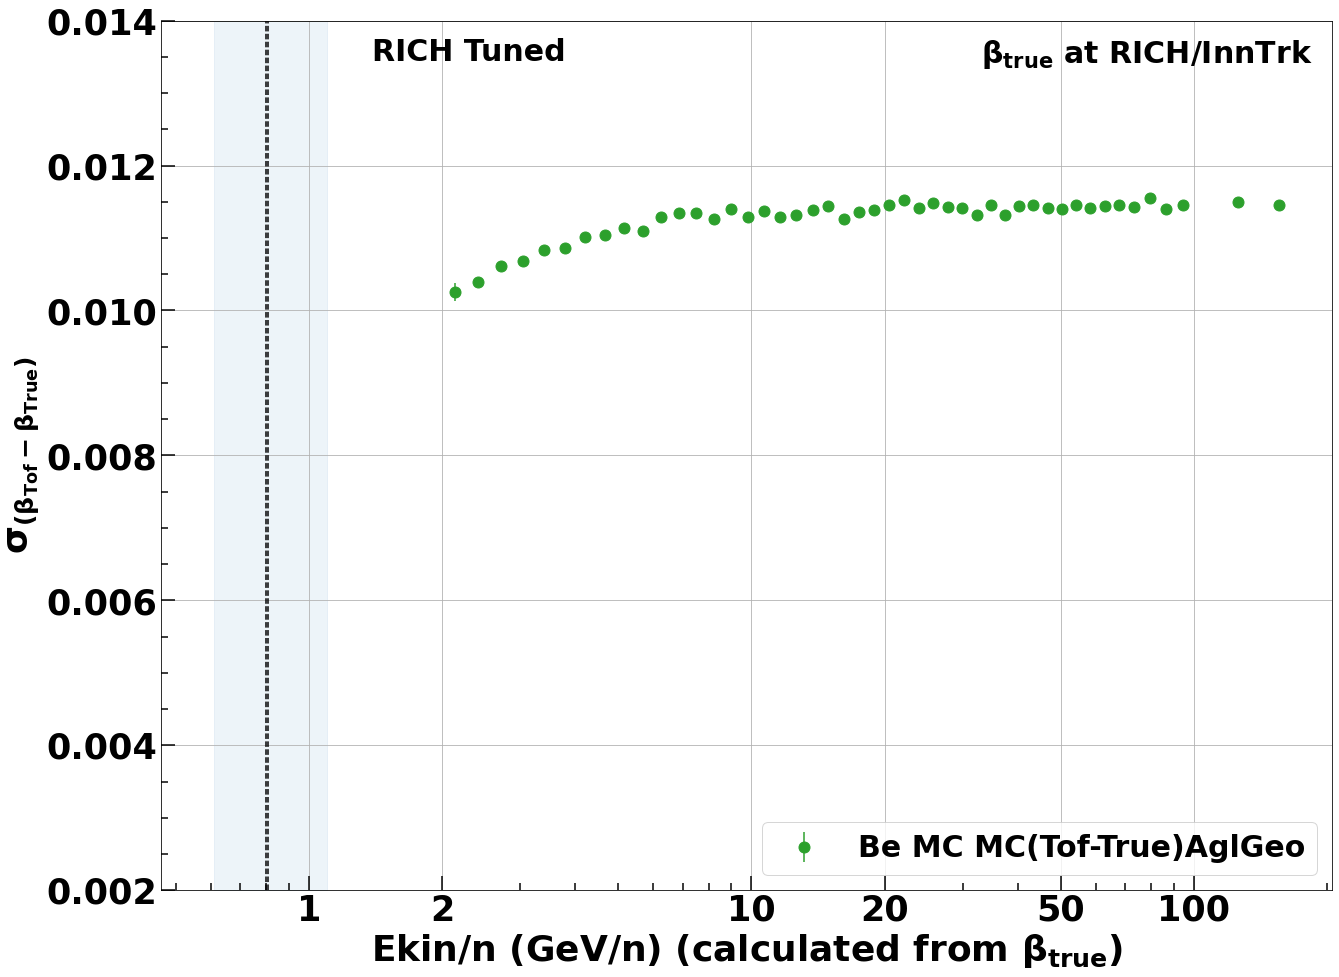

In [34]:

graph_mean_mcTofTrueResidual = {}
graph_sigma_mcTofTrueResidual = {}
minbin = {'Tof': 1, 'NaF': 1, 'Agl': 10}
maxbin = {'Tof': 60, 'NaF': 60, 'Agl': 60}
#refGeos = {'Tof', 'NaF', 'Agl'}
refGeos = {'Agl'}

for refGeo in refGeos:
    graph_mean_mcTofTrueResidual[refGeo], graph_sigma_mcTofTrueResidual[refGeo] = get_musigma_gausfit(hist2d_mc_tofTrueGeo[refGeo], minbin[refGeo], maxbin[refGeo])
    

fig, ax1 = plt.subplots(1, 1, figsize=(21, 16))
for refGeo in refGeos:
    plot_graph(fig, ax1, graph_sigma_mcTofTrueResidual[refGeo], color=DETECTOR_COLOR[refGeo],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{MCName} MC(Tof-True){refGeo}Geo')
    
    
#plot_graph(fig, ax1, graph_sigma_mchighR, color='magenta',  style="EP", xlog=False, ylog=False, scale=None, markersize=22, label=f'MC (Ekn>98GeV/n)')

ax1.set_ylim([0.002, 0.014])
    
    
custom_ticks = [1, 2, 10 ,20, 50, 100]  # Adjust these as needed
custom_labels = ['1', '2', '10', '20', '50', '100']  # Labels for the ticks
#ax1.set_xticks(custom_ticks)
#ax1.set_xticklabels(custom_labels)
ax1.set_xscale('log')
ax1.set_xticks(custom_ticks)
ax1.set_xticklabels(custom_labels)
#ax1.legend()

ax1.axvline(x=0.81, color='black', linestyle='--')
ax1.axvline(x=0.8, color='black', linestyle='--')
ax1.fill_betweenx(np.linspace(0.002, 0.014, 100), 0.61, 1.1, alpha=0.08, color="tab:blue")
ax1.legend(loc='lower right', fontsize=30)
#ax2.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('')
#ax1.sharex(ax2)
ax1.set_xlabel(r'Ekin/n (GeV/n) (calculated from $\mathrm{\beta_{true}}$)')
ax1.grid()
ax1.set_ylabel(r'$\mathrm{\sigma_{(\beta_{Tof} - \beta_{True})}}$')
ax1.text(0.7, 0.98, r"$\mathrm{\beta_{true} \ at \ RICH/InnTrk}$", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
ax1.text(0.18, 0.98, f"RICH {figtext}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")          
savefig_tofile(fig, plotfile, f"graph_sigma_{figsuffix}_{nuclei}_compareTofResoTrue_Geo", show=True) 

    